# **Тестовое задание на позицию ML Инженер'**

---

Цели и задачи работы:

На основе данных в файле train.csv научить модель, которая по любым параметрам из файла будет предсказывать колонку revenue_30d_total.
Цель: максимально точно предсказать это значение.
Метрика контроля качества: относительная ошибка на каждом пользователе:
(predicted_revenue_30d_total - revenue_30d_total) / revenue_30d_total




---

Описание датасет df_sessions

"random_user_id" - уникальный идентификатор пользователя
"install_date" - дата установки пользователем приложения (первый вход)
"ua_network_name" - источник установки (UA - купленный по рекламе пользователь, Organic - пользователь сам нашел приложение в магазине)
"country_code" - страна пользователя
"user_agent" - идентификационная строка клиентского приложения
"revenue_30d_total" - суммарный доход, полученный с пользователя за 30 дней жизни в приложении (целевая метрика, которую и надо будет предсказывать)
"revenue_24h_total" - суммарный доход, полученный от пользователя за первые 24 часа после установки в приложении (включает все источники дохода, по сути сумма трех колонок ниже). 
"revenue_24h_banner" - суммарный доход, полученный от пользователя за первые 24 часа после установки от просмотра баннерной рекламы
"revenue_24h_inters" - суммарный доход, полученный от пользователя за первые 24 часа после установки от просмотра рекламы поп-апов 
"revenue_24h_rewards" - суммарный доход, полученный от пользователя за первые 24 часа после установки от просмотра рекламы, за которую получает внутриигровые бонусы
"ad_views_24h_total" - количество просмотров рекламы всех типов за первые 24 часа после установки
"ad_views_24h_banner" - количество просмотров баннерной рекламы за первые 24 часа после установки
"ad_views_24h_inters" - количество просмотров поп-ап рекламы за первые 24 часа после установки
"ad_views_24h_rewards" - количество просмотров рекламы, за которую получает внутриигровые бонусы, за первые 24 часа после установки
"sessions_24h" - количество сессий (входов) в приложение за первые 24 часа после установки
"conversion_duration" - время в секундах между просмотром рекламы нашего приложения и установкой приложения (учитывается не для всех источников рекламы, по-умолчанию 0)
"language" - язык устройства
"api_level" - https://developer.android.com/studio/releases/platforms
"device_price" - примерная стоимость девайса на момент старта продаж в $ (определяется неточно, и не для всех пользователей)
"device_ram" - количество оперативной памяти на устройстве пользователя
"cpu_cores" - количество ядер процессора в устройстве пользователя
"screen_inches_diagonal" - диагональ экрана устройства пользователя
"screen_pixels_width" - разрешение экрана по ширине
"screen_pixels_height" - разрешение экрана по высоте



# **1. DATA UNDERSTANDING & DATA PREPARATION**

---



## **ИМПОРТ БИБЛИОТЕК**

---

In [1]:

from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
import pickle
!pip install scipy==1.7.1
!pip install jupyterthemes
import time
import sys
import warnings
from pathlib import Path
from typing import Sequence, Union
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **ЗАГРУЗКА И ОЦЕНКА ДАТАСЕТ с локального компа**


---

### Загрузка датасет test.csv

In [2]:
# подготовим абсолютный путь до папки с данными
path = os.path.expanduser('~/PycharmProjects/Brightika_test/')
path

start = time.time() # включим таймер для подсчета времени чтения файла в датасет

test = pd.read_csv(path + 'test.csv')
elapsed_time = time.time() - start # зафиксируем время чтения файла в датасет
print(f'Датасет событий успешно прочитан из файла ga_hits.csv, \nРазмеры датасета: {test.shape}, \nВремя чтения файла в датасет: {elapsed_time:.3f}')
#df.shape

Датасет событий успешно прочитан из файла ga_hits.csv, 
Размеры датасета: (1770460, 24), 
Время чтения файла в датасет: 3.022


### Загрузка датасет train.csv

In [3]:
start = time.time() # включим таймер для подсчета времени чтения файла в датасет
train = pd.read_csv(path + 'train.csv', low_memory=False)
elapsed_time = time.time() - start # зафиксируем время чтения файлма в датасет
print(f'Датасет сеансов успешно прочитан из файла ga_sessions.csv, \nРазмеры датасета: {train.shape}, \nВремя чтения файла в датасет: {elapsed_time:.3f}')
#df.shape

Датасет сеансов успешно прочитан из файла ga_sessions.csv, 
Размеры датасета: (4125714, 24), 
Время чтения файла в датасет: 10.978


## **АНАЛИЗ ДАТАСЕТ TRAIN.CSV, TEST.CSV**


---

В датасет train есть пропуски.
api_level                   2.817549
language                    2.819633
user_agent                 40.778663
country_code              100.000000 удалим колонку

в test
api_level                   2.850163
language                    2.852027
user_agent                 40.770478
country_code              100.00000  удалим колонку



###  Пропуски/ дубликаты выборки 

In [4]:

#размер выборки  
print('Размер выбоpки train: {}, {}'.format(train.shape[0], train.shape[1]))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))
print('Пропущенные значения train:', ((train.isna().sum()/len(train)) * 100).sort_values())
print('Пропущенные значения test:', ((test.isna().sum()/len(test)) * 100).sort_values())
print(f'Количество дубликатов в test: {test.duplicated().sum()}') 
print(f'Количество дубликатов в train: {train.duplicated().sum()}') 

#удалим колонки с пропусками
train = train.drop(['country_code'], axis=1)
test = test.drop(['country_code'], axis=1)

Размер выбоpки train: 4125714, 24
Размер выбоpки test: 1770460, 24
Пропущенные значения train: random_user_id              0.000000
screen_inches_diagonal      0.000000
cpu_cores                   0.000000
device_ram                  0.000000
device_price                0.000000
conversion_duration         0.000000
sessions_24h                0.000000
ad_views_24h_rewards        0.000000
ad_views_24h_inters         0.000000
screen_pixels_width         0.000000
ad_views_24h_banner         0.000000
revenue_24h_rewards         0.000000
revenue_24h_inters          0.000000
revenue_24h_banner          0.000000
revenue_24h_total           0.000000
revenue_30d_total           0.000000
ua_network_name             0.000000
install_date                0.000000
ad_views_24h_total          0.000000
screen_pixels_height        0.000000
api_level                   2.817549
language                    2.819633
user_agent                 40.778663
country_code              100.000000
dtype: float64
Пр

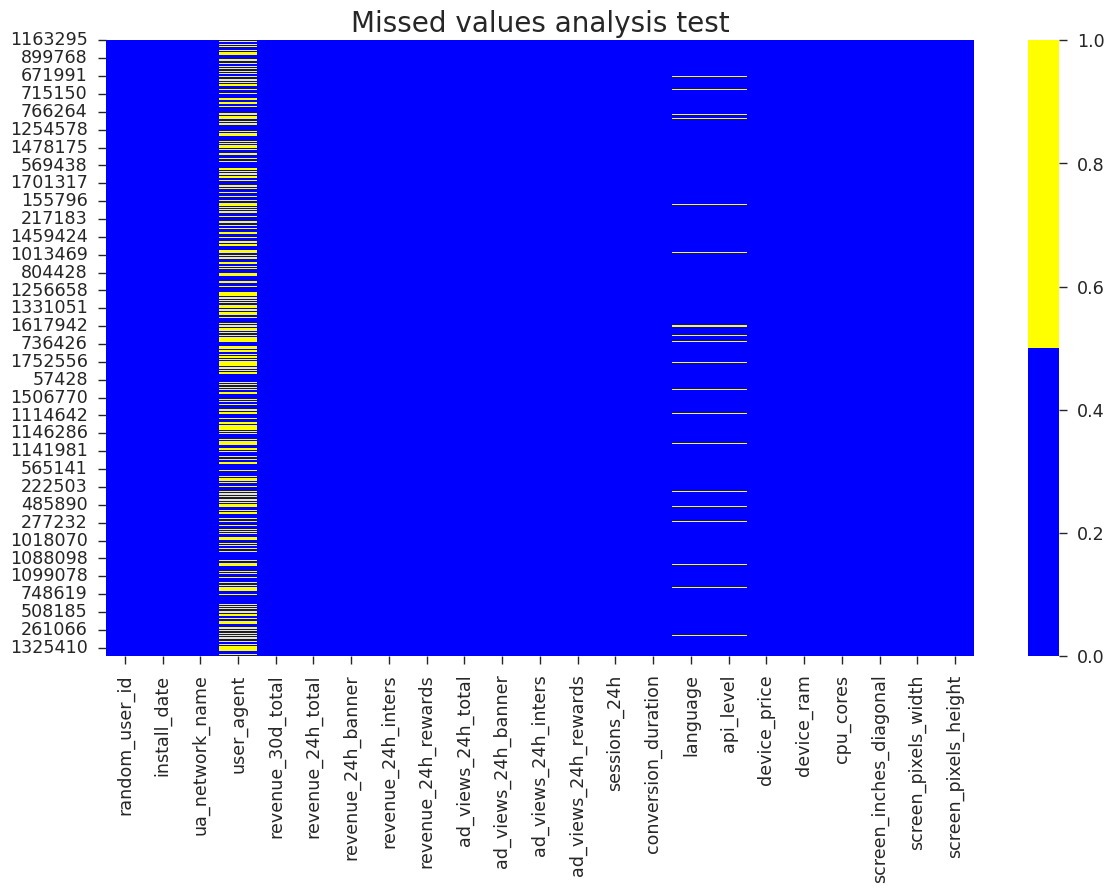

In [5]:
from jupyterthemes import jtplot
jtplot.style(context='notebook', ticks=True, grid=False)

plt.figure(figsize=(14, 8))
plt.title('Missed values analysis test', fontsize=20)
sns.heatmap(test.sample(2000).isnull(), cmap=sns.color_palette(['blue', 'yellow']))
plt.show()

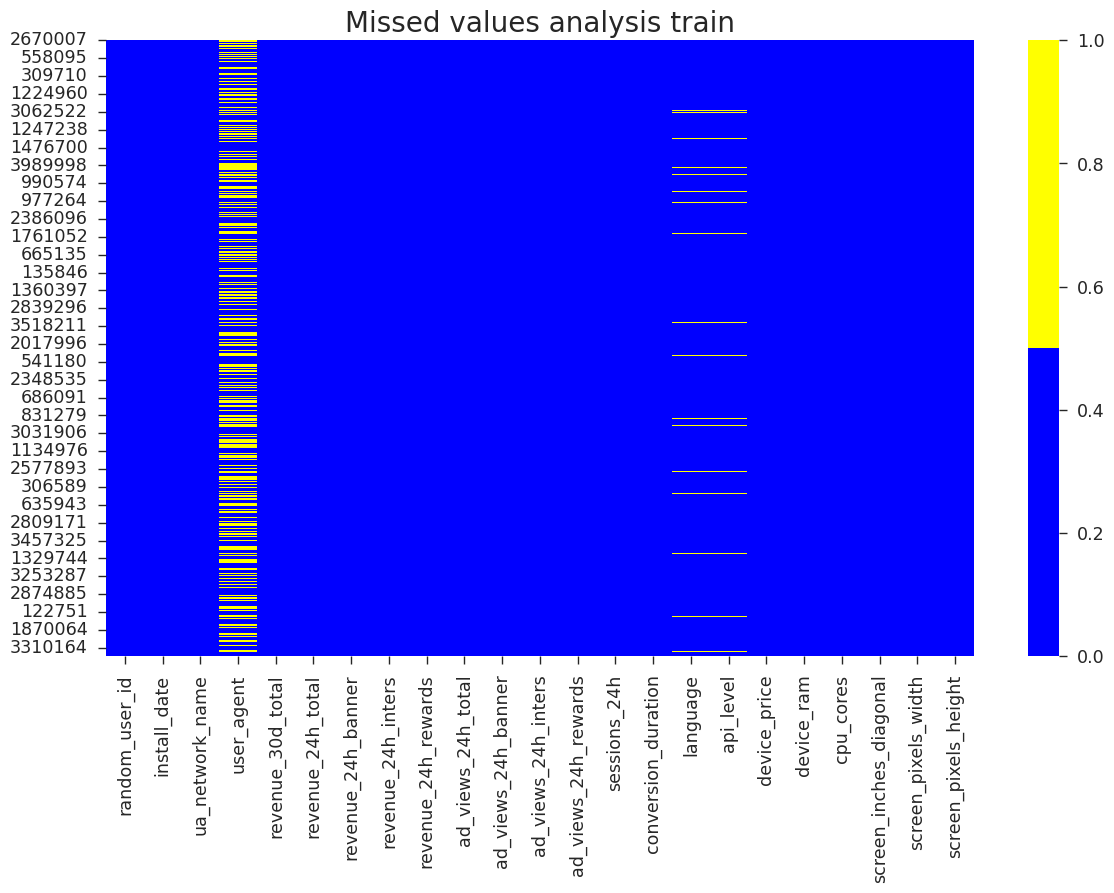

In [6]:
plt.figure(figsize=(14, 8))
plt.title('Missed values analysis train', fontsize=20)
sns.heatmap(train.sample(2000).isnull(), cmap=sns.color_palette(['blue', 'yellow']))
plt.show()

In [7]:
test.describe(include='all')

,random_user_id,install_date,ua_network_name,user_agent,revenue_30d_total,revenue_24h_total,revenue_24h_banner,revenue_24h_inters,revenue_24h_rewards,ad_views_24h_total,...,sessions_24h,conversion_duration,language,api_level,device_price,device_ram,cpu_cores,screen_inches_diagonal,screen_pixels_width,screen_pixels_height
count,1770460,1770460,1770460,1048635,1770460.0,1.770460e+06,1.770460e+06,1.770460e+06,1.770460e+06,1.770460e+06,...,1.770460e+06,1.770460e+06,1719966,1.719999e+06,1.770460e+06,1.770460e+06,1.770460e+06,1.770460e+06,1.770460e+06,1.770460e+06
unique,1751689,214,1,19344,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7112c3452cff186c88c9686fa69e452263a7c61e,2022-03-05,UA,Dalvik/2.1.0 (Linux; U; Android 11; SM-A127F B...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,65,20179,1770460,9498,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,715698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.0,7.437033e-02,9.825445e-03,4.680594e-02,1.773895e-02,3.275796e+01,...,1.746078e+00,1.114622e+04,NaN,2.918446e+01,1.685466e+02,2.976588e+03,4.498961e+00,3.800861e+00,5.611799e+02,1.146826e+03
std,NaN,NaN,NaN,NaN,0.0,2.714315e-01,3.818522e-02,1.772535e-01,8.810133e-02,6.619304e+01,...,1.266697e+00,7.342706e+04,NaN,1.800657e+00,2.643569e+02,3.173326e+03,3.863408e+00,3.224470e+00,5.138197e+02,1.035729e+03
min,NaN,NaN,NaN,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,NaN,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.0,2.097256e-03,1.260798e-04,0.000000e+00,0.000000e+00,3.000000e+00,...,1.000000e+00,0.000000e+00,NaN,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,0.0,1.239809e-02,1.226491e-03,6.934882e-03,1.020333e-03,1.200000e+01,...,1.000000e+00,4.500000e+01,NaN,3.000000e+01,1.000000e+02,3.072000e+03,8.000000e+00,6.000000e+00,7.200000e+02,1.520000e+03
75%,NaN,NaN,NaN,NaN,0.0,4.586436e-02,5.474568e-03,2.723753e-02,8.033916e-03,3.500000e+01,...,2.000000e+00,5.600000e+02,NaN,3.000000e+01,2.000000e+02,4.096000e+03,8.000000e+00,6.500000e+00,1.080000e+03,2.312000e+03


### random_user_id — уникальный идентификатор пользователя
состоит из уникальных имен - практически весь датасет, есть повторяющиеся (пользователи, которые заходили больше одного раза)

In [8]:
# test есть повторяющиеся пользователи не все уникальные имена

print('кол-во уникальных значений', test['random_user_id'].nunique())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))
print(f'Количество пропусков в test: {test.random_user_id.isna().sum()}')


# train есть повторяющиеся пользователи не все уникальные имена
print('кол-во уникальных значений', train['random_user_id'].nunique())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))
print(f'Количество пропусков в train: {train.random_user_id.isna().sum()}')


кол-во уникальных значений 1751689
Размер выбоpки test: 1770460, 23
Количество пропусков в test: 0
кол-во уникальных значений 4071036
Размер выбоpки test: 4125714, 23
Количество пропусков в train: 0


### install_date - дата установки пользователем приложения (первый вход)
уникальных значений 214. создадим новый признак время по месяцам, рассмотрим кол-во самых популярных месяцев. Это 8 месяц  Август

In [9]:
# переведем формат в дату
test['install_date'] = pd.to_datetime(test.install_date, utc=True)
train['install_date'] = pd.to_datetime(train.install_date, utc=True)
print(test.install_date.dtype)
print(train.install_date.dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]


In [10]:
# test 

print('кол-во уникальных значений', test['install_date'].nunique())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['install_date'].nunique())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))

кол-во уникальных значений 214
Размер выбоpки test: 1770460, 23
кол-во уникальных значений 214
Размер выбоpки test: 4125714, 23


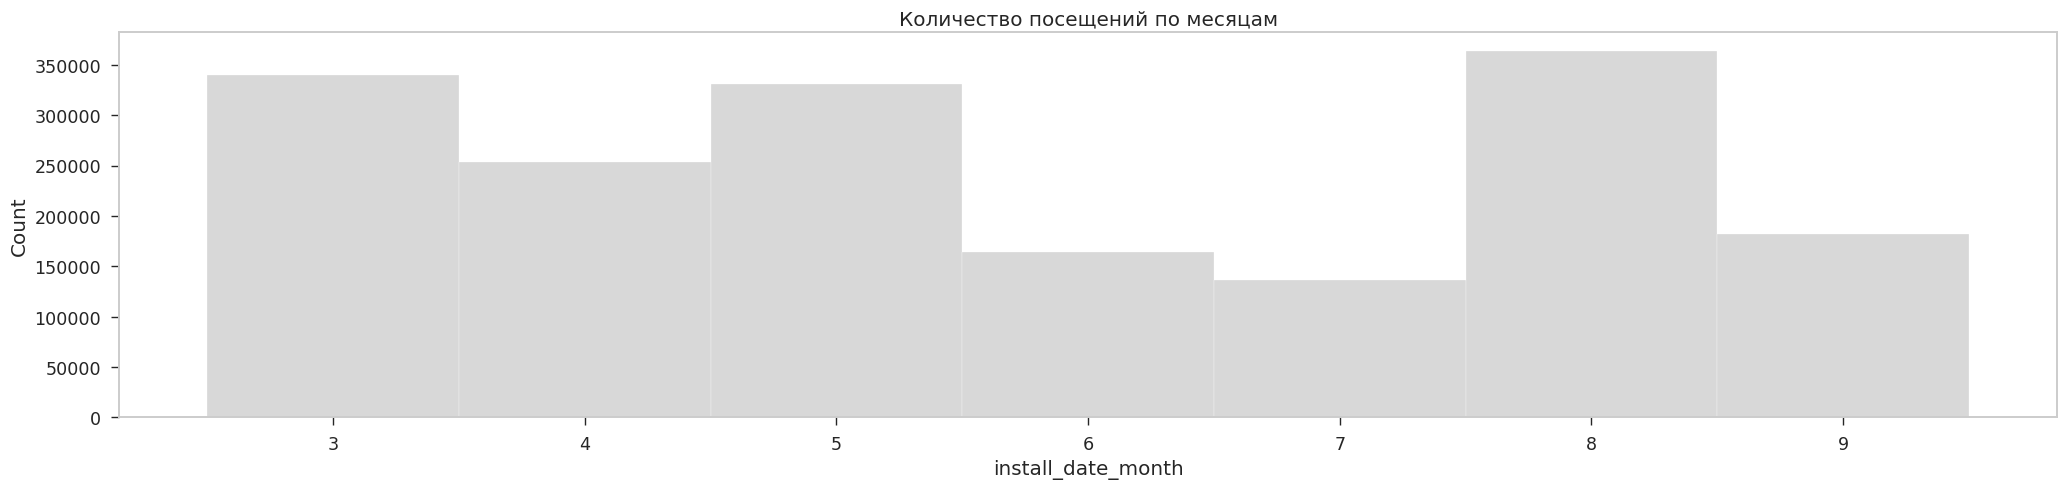

In [11]:
test['install_date_month'] = test['install_date'].dt.month
plt.figure(figsize=(25, 5))
sns.histplot(data=test, x='install_date_month', discrete=True)
plt.title('Количество посещений по месяцам');

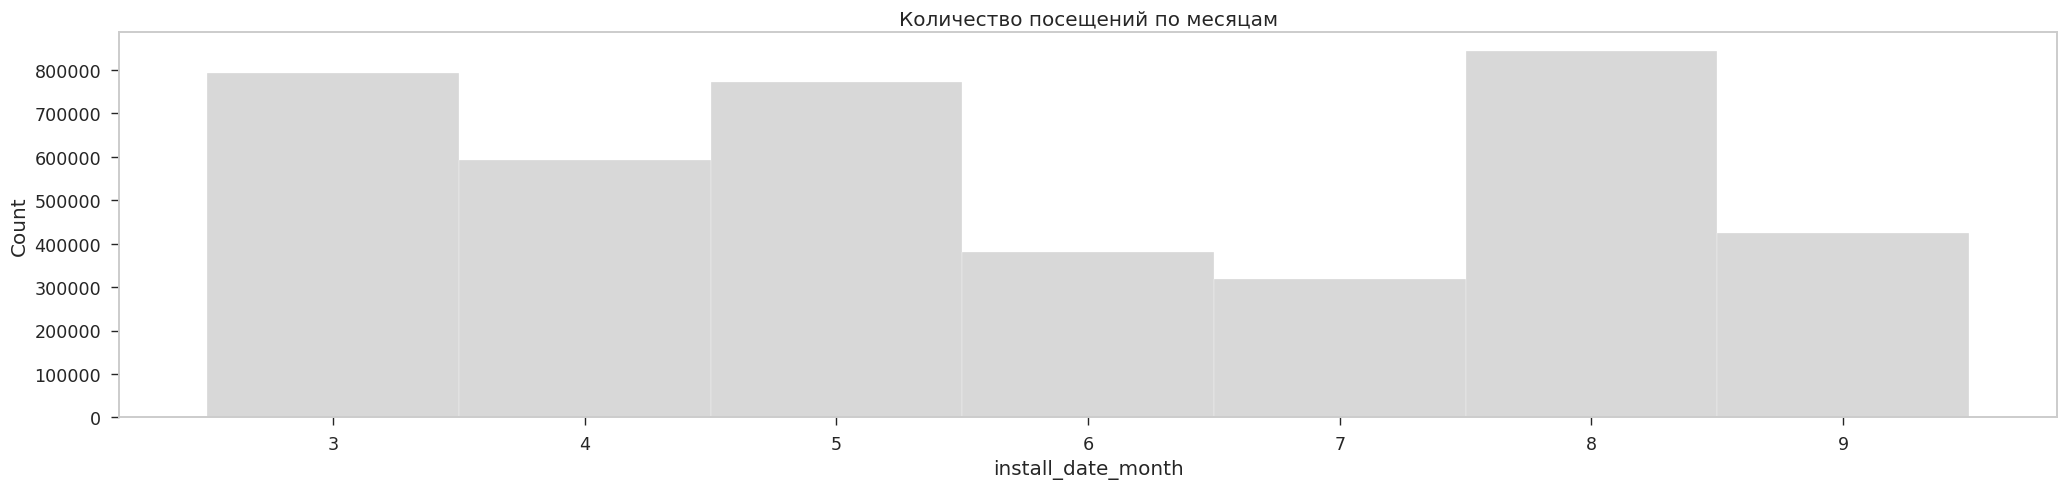

In [12]:
train['install_date_month'] = train['install_date'].dt.month
plt.figure(figsize=(25, 5))
sns.histplot(data=train, x='install_date_month', discrete=True)
plt.title('Количество посещений по месяцам');

In [13]:
train['install_date_day'] = train['install_date'].dt.day
test['install_date_day'] = test['install_date'].dt.day

### ua_network_name  источник установки (UA - купленный по рекламе пользователь, Organic - пользователь сам нашел приложение в магазине)
Уникальных значений 1, столбец не несет смысловой нагрузки. Удаляем из моделирования 

In [14]:
# test 
print('кол-во уникальных значений', test['ua_network_name'].unique())

# train 
print('кол-во уникальных значений', train['ua_network_name'].unique())


кол-во уникальных значений ['UA']
кол-во уникальных значений ['UA']


In [15]:
#удалим колонку ua_network_name
train = train.drop(['ua_network_name'], axis=1)
test = test.drop(['ua_network_name'], axis=1)

### user_agent -идентификационная строка клиентского приложения 
кол-во уникальных значений 19344 . с данной колонки можно будет в будущем нагенерить фич, по ОС сис-ме (линукс. мак, винда и тд) 

In [16]:
# test 

print('кол-во уникальных значений', test['user_agent'].nunique())
print('уникальные значения', test['user_agent'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['user_agent'].nunique())
print('уникальные значения', train['user_agent'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))

кол-во уникальных значений 19344
уникальные значения Dalvik/2.1.0 (Linux; U; Android 11; SM-A127F Build/RP1A.200720.012)           9498
Dalvik/2.1.0 (Linux; U; Android 11; SM-A125F Build/RP1A.200720.012)           8774
Dalvik/2.1.0 (Linux; U; Android 11; RMX3231 Build/RP1A.201005.001)            7761
Dalvik/2.1.0 (Linux; U; Android 11; SM-A217F Build/RP1A.200720.012)           6002
Dalvik/2.1.0 (Linux; U; Android 10; STK-L21 Build/HUAWEISTK-L21)              5952
                                                                              ... 
Dalvik/2.1.0 (Linux; U; Android 10; Mi 9T Pro MIUI/V11.0.3.0.QFKMIXM)            1
Dalvik/2.1.0 (Linux; U; Android 11; R106 Build/RQ2A.210505.003)                  1
Dalvik/2.1.0 (Linux; U; Android 11; MD_G1212U Build/R01005)                      1
Dalvik/2.1.0 (Linux; U; Android 9; Mi Note 10 Pro MIUI/V11.0.17.0.PFDEUXM)       1
Dalvik/2.1.0 (Linux; U; Android 6.0; Redmi Note 4 MIUI/7.5.11)                   1
Name: user_agent, Length: 19344, d

In [17]:
test_split = test['user_agent'].str.split('(', expand=True)
test_split = test_split.drop([0, 2, 3], axis=1)
test_split = test_split[1].str.split(';', expand=True)
test_split = test_split.drop([1, 4], axis=1)

In [18]:
# после разбиения строк, вышло, что ОС - только Линукс, данный столбец не несет смысла
# можно извлечь инфо из 2 столбца - версии Андроид
# 3 столбец также можно удалять. пропуски заполнить частым значением
test_split.describe()

,0,2,3
count,1048635,1048635,1048627
unique,1,69,18107
top,Linux,Android 11,moto g
freq,1048635,415632,9764


In [19]:
test_split = test_split.drop([0, 3], axis=1)
test_split[2].value_counts()
test['Android']=test_split
test['Android']=test.Android.fillna('Android 11')

In [20]:
train_split = train['user_agent'].str.split('(', expand=True)
train_split = train_split.drop([0, 2, 3], axis=1)
train_split = train_split[1].str.split(';', expand=True)
train_split = train_split.drop([1, 4], axis=1)

In [21]:
# после разбиения строк, вышло, что ОС - только Линукс, данный столбец не несет смысла
# можно извлечь инфо из 2 столбца - версии Андроид
# 3 столбец также можно удалять. пропуски заполнить частым значением Android 11
train_split.describe()

,0,2,3
count,2443303,2443303,2443279
unique,1,83,23972
top,Linux,Android 11,moto g
freq,2443303,970629,22490


In [22]:
train_split = train_split.drop([0, 3], axis=1)
train_split[2].value_counts()
train['Android']=test_split
#пропуски заполнить частым значением Android 11
train['Android']=train.Android.fillna('Android 11')

In [23]:
# удалим сам столбец user_agent
train = train.drop(['user_agent'], axis=1)
test = test.drop(['user_agent'], axis=1)

 ### revenue_30d_total - суммарный доход, полученный с пользователя за 30 дней жизни в приложении (целевая метрика, которую и надо будет предсказывать)

Целевая колонка, которую необходимо предсказать
в тестовой выборке одно значение 0, в train выборке разброс, основное целевые стоимости в диапозоне 0-0.9
mean           0.2
std            0.9
min            0.0
25%            0.0
50%            0.0
75%            0.1
max          178.4

In [24]:
# test 

print('кол-во уникальных значений', test['revenue_30d_total'].nunique())
print('уникальные значения', test['revenue_30d_total'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['revenue_30d_total'].nunique())
print('уникальные значения', train['revenue_30d_total'].value_counts())
print('статистика', train['revenue_30d_total'].describe().apply(lambda x: f'{x:.4f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))

кол-во уникальных значений 1
уникальные значения 0    1770460
Name: revenue_30d_total, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 3501526
уникальные значения 0.000000    506859
0.000200      4618
0.000100      2369
0.000040      1451
0.001300      1184
             ...  
0.689373         1
0.145679         1
0.038371         1
0.066788         1
0.879482         1
Name: revenue_30d_total, Length: 3501526, dtype: int64
статистика count    4125714.0000
mean           0.1770
std            0.9328
min            0.0000
25%            0.0035
50%            0.0194
75%            0.0806
max          178.3959
Name: revenue_30d_total, dtype: object
Размер выбоpки test: 4125714, 24


#выбросы в колонке, которую нужно предсказать revenue_30d_total 571818
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.revenue_30d_total)
is_outlier = (train.revenue_30d_total < boundaries[0]) | (train.revenue_30d_total > boundaries[1]) 

print('границы значений revenue_30d_total', boundaries)
print('кол-во выбросов в revenue_30d_total',is_outlier.sum())


#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'revenue_30d_total'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.revenue_30d_total.describe())


### revenue_24h_total - суммарный доход, полученный от пользователя за первые 24 часа после установки в приложении (включает все источники дохода, по сути сумма трех колонок ниже). 

много значений = 0



In [25]:
# test 

print('кол-во уникальных значений', test['revenue_24h_total'].nunique())
print('уникальные значения', test['revenue_24h_total'].value_counts())
print('статистика', test['revenue_24h_total'].describe().apply(lambda x: f'{x:.4f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['revenue_24h_total'].nunique())
print('уникальные значения', train['revenue_24h_total'].value_counts())
print('статистика', train['revenue_24h_total'].describe().apply(lambda x: f'{x:.4f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))

кол-во уникальных значений 1456630
уникальные значения 0.000000    264615
0.000200      2100
0.000100      1073
0.000040       688
0.001300       538
             ...  
0.073889         1
0.073349         1
0.014816         1
0.005947         1
0.018984         1
Name: revenue_24h_total, Length: 1456630, dtype: int64
статистика count    1770460.0000
mean           0.0744
std            0.2714
min            0.0000
25%            0.0021
50%            0.0124
75%            0.0459
max           37.1566
Name: revenue_24h_total, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 3373459
уникальные значения 0.000000    615443
0.000200      4910
0.000100      2496
0.000040      1658
0.001300      1277
             ...  
0.064688         1
0.033092         1
0.061107         1
0.019931         1
0.879482         1
Name: revenue_24h_total, Length: 3373459, dtype: int64
статистика count    4125714.0000
mean           0.0746
std            0.2732
min            0.0000
25% 

#выбросы в колонке, revenue_24h_total 538409
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.revenue_24h_total)
is_outlier = (train.revenue_24h_total < boundaries[0]) | (train.revenue_24h_total > boundaries[1]) 

print('границы значений revenue_24h_total', boundaries)
print('кол-во выбросов в revenue_24h_total',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'revenue_24h_total'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.revenue_24h_total.describe())



### revenue_24h_banner - суммарный доход, полученный от пользователя за первые 24 часа после установки от просмотра баннерной рекламы


In [26]:
# test 

print('кол-во уникальных значений', test['revenue_24h_banner'].nunique())
print('уникальные значения', test['revenue_24h_banner'].value_counts())
print('статистика', test['revenue_24h_banner'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['revenue_24h_banner'].nunique())
print('уникальные значения', train['revenue_24h_banner'].value_counts())
print('статистика', train['revenue_24h_banner'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))

кол-во уникальных значений 1236366
уникальные значения 0.000000    362126
0.000200      6732
0.000100      4063
0.000400      2118
0.000050      2074
             ...  
0.000852         1
0.000229         1
0.000579         1
0.001362         1
0.009984         1
Name: revenue_24h_banner, Length: 1236366, dtype: int64
статистика count    1770460.00000
mean           0.00983
std            0.03819
min            0.00000
25%            0.00013
50%            0.00123
75%            0.00547
max            6.03973
Name: revenue_24h_banner, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 2802036
уникальные значения 0.000000    843476
0.000200     15616
0.000100      9490
0.000400      4893
0.000040      4820
             ...  
0.073253         1
0.011640         1
0.118128         1
0.034600         1
0.059847         1
Name: revenue_24h_banner, Length: 2802036, dtype: int64
статистика count    4125714.00000
mean           0.00990
std            0.03923
min         

#выбросы в колонке,  revenue_24h_banner 572111
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.revenue_24h_banner)
is_outlier = (train.revenue_24h_banner < boundaries[0]) | (train.revenue_24h_banner > boundaries[1]) 

print('границы значений revenue_24h_banner', boundaries)
print('кол-во выбросов в revenue_24h_banner',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'revenue_24h_banner'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.revenue_24h_banner.describe())


### revenue_24h_inters суммарный доход, полученный от пользователя за первые 24 часа после установки от просмотра рекламы поп-апов 



In [27]:
# test 

print('кол-во уникальных значений', test['revenue_24h_inters'].nunique())
print('уникальные значения', test['revenue_24h_inters'].value_counts())
print('статистика', test['revenue_24h_inters'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['revenue_24h_inters'].nunique())
print('уникальные значения', train['revenue_24h_inters'].value_counts())
print('статистика', train['revenue_24h_inters'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 1230608
уникальные значения 0.000000    456393
0.005000      2905
0.001100      1907
0.010000      1779
0.002000      1497
             ...  
0.018317         1
0.006290         1
0.003299         1
0.003264         1
0.018770         1
Name: revenue_24h_inters, Length: 1230608, dtype: int64
статистика count    1770460.00000
mean           0.04681
std            0.17725
min            0.00000
25%            0.00000
50%            0.00693
75%            0.02724
max           26.16956
Name: revenue_24h_inters, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 2834852
уникальные значения 0.000000    1063242
0.005000       6917
0.010000       4356
0.001100       4290
0.002000       3527
             ...   
0.105005          1
0.068402          1
1.031693          1
0.001181          1
0.675434          1
Name: revenue_24h_inters, Length: 2834852, dtype: int64
статистика count    4125714.00000
mean           0.04694
std            0.17822
m

#выбросы в колонке,  revenue_24h_inters 539711
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.revenue_24h_inters)
is_outlier = (train.revenue_24h_inters < boundaries[0]) | (train.revenue_24h_inters > boundaries[1]) 

print('границы значений revenue_24h_inters', boundaries)
print('кол-во выбросов в revenue_24h_inters',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'revenue_24h_inters'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.revenue_24h_inters.describe())


### revenue_24h_rewards -  суммарный доход, полученный от пользователя за первые 24 часа после установки от просмотра рекламы, за которую получает внутриигровые бонусы


In [28]:
# test 

print('кол-во уникальных значений', test['revenue_24h_rewards'].nunique())
print('уникальные значения', test['revenue_24h_rewards'].value_counts())
print('статистика', test['revenue_24h_rewards'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['revenue_24h_rewards'].nunique())
print('уникальные значения', train['revenue_24h_rewards'].value_counts())
print('статистика', train['revenue_24h_rewards'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 799933
уникальные значения 0.000000    817400
0.008000      2144
0.026000      2015
0.003000      1938
0.045000      1925
             ...  
0.011187         1
0.005161         1
0.013485         1
0.007542         1
0.007545         1
Name: revenue_24h_rewards, Length: 799933, dtype: int64
статистика count    1770460.00000
mean           0.01774
std            0.08810
min            0.00000
25%            0.00000
50%            0.00102
75%            0.00803
max           17.10807
Name: revenue_24h_rewards, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 1814681
уникальные значения 0.000000    1907810
0.008000       5066
0.026000       4713
0.012000       4609
0.003000       4582
             ...   
0.595040          1
0.004418          1
0.000590          1
0.003542          1
0.144201          1
Name: revenue_24h_rewards, Length: 1814681, dtype: int64
статистика count    4125714.00000
mean           0.01778
std            0.08888


#выбросы в колонке,  revenue_24h_rewards 591239
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.revenue_24h_rewards)
is_outlier = (train.revenue_24h_rewards < boundaries[0]) | (train.revenue_24h_rewards > boundaries[1]) 

print('границы значений revenue_24h_rewards', boundaries)
print('кол-во выбросов в revenue_24h_rewards',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'revenue_24h_rewards'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.revenue_24h_rewards.describe())


### сделаем суммарные графики по доходам
revenue_30d_total
revenue_24h_total
revenue_24h_banner
revenue_24h_inters - доход, полученный от пользователя за первые 24 часа после установки от просмотра рекламы поп-апов выглядит более прибыльным на фоне остальных
revenue_24h_rewards

Num_cols: 20
Cat_cols: 4


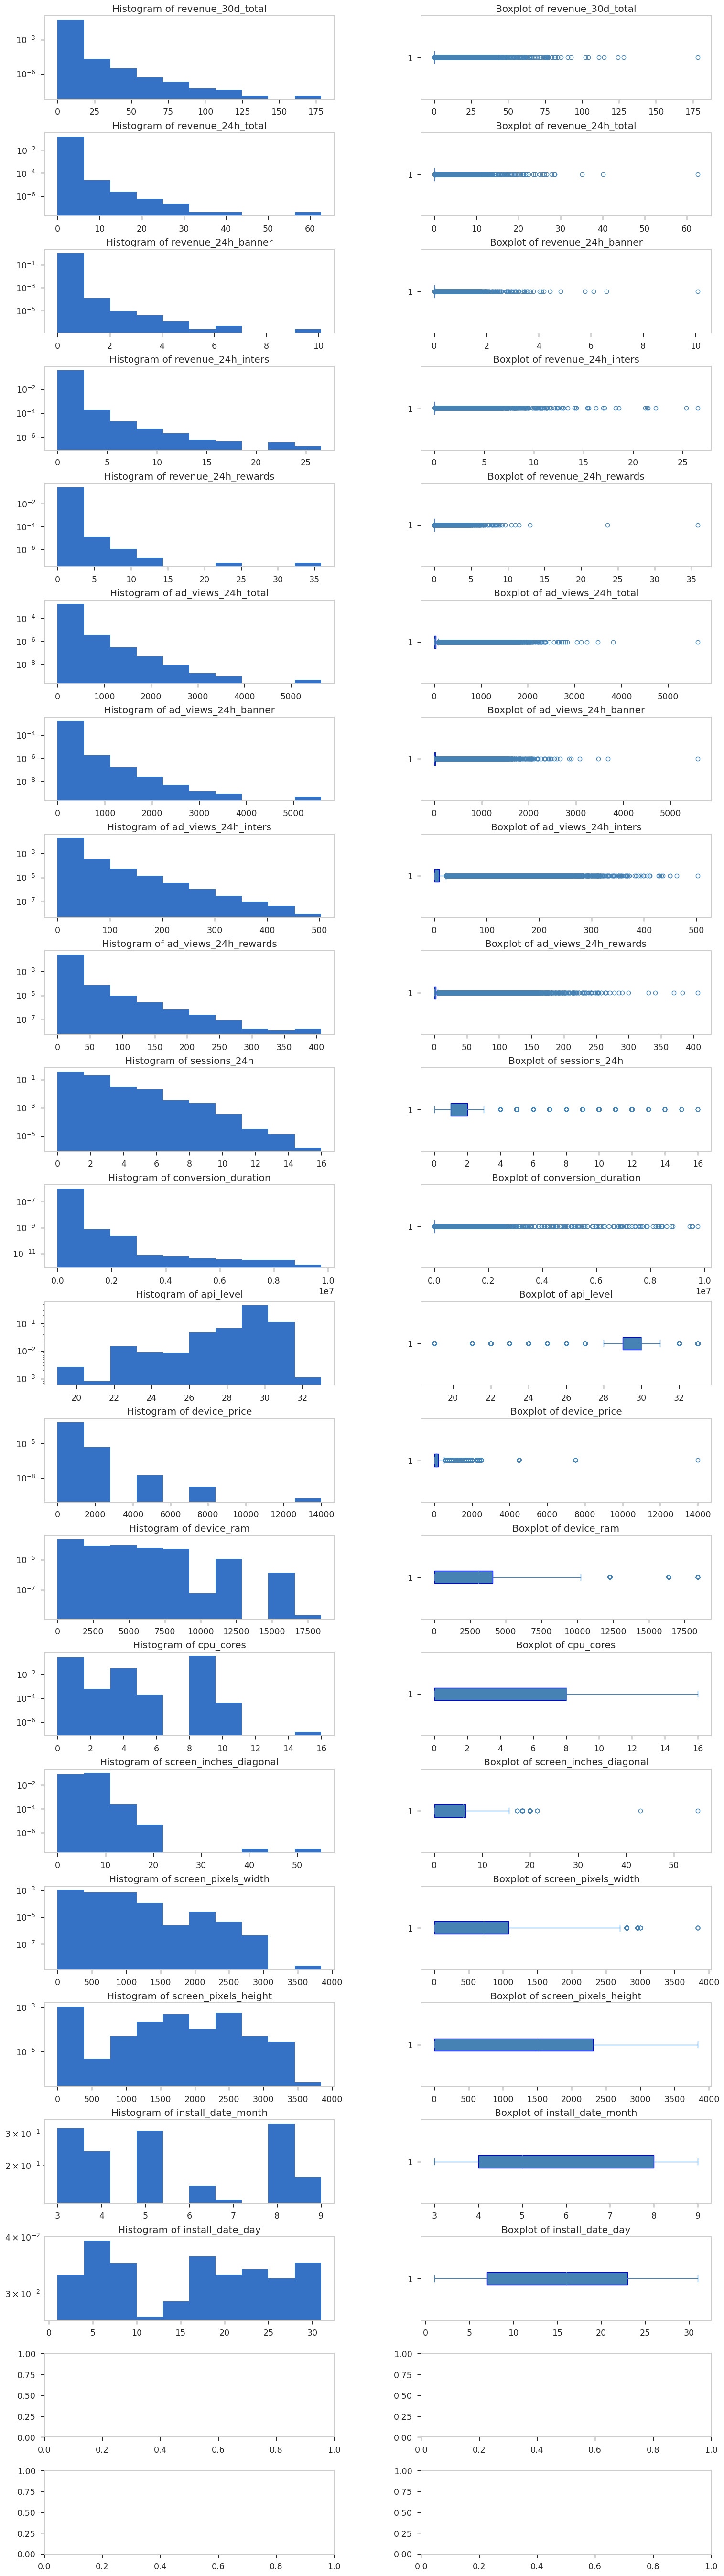

In [29]:
sns.boxplot(x=train["install_date_month"], y=train['revenue_24h_banner']);
plt.ylim(0, 0.01)
plt.title('Диаграмма размаха revenue_24h_banner по месяцам');numeric_cols = train.select_dtypes(include=[np.number]).columns
string_cols = train.select_dtypes(exclude=[np.number]).columns
print(f'Num_cols: {len(numeric_cols)}\nCat_cols: {len(string_cols)}')

rows_num = len(numeric_cols) + len(string_cols) // 2
fig, ax = plt.subplots(nrows=rows_num, ncols=2)
axes = ax.flatten()
i = 0

for col in numeric_cols:
    not_null_values = train.loc[~train[col].isnull(), col]     
    axes[i].hist(not_null_values, density=True, log=True)
    axes[i].set_title(f'Histogram of {col}')
    i += 1

    axes[i].boxplot(not_null_values, vert=False, patch_artist=True,
                    boxprops=dict(facecolor='steelblue', color='blue'),
                    capprops=dict(color='steelblue'),
                    whiskerprops=dict(color='steelblue'),
                    flierprops=dict(color='steelblue', markeredgecolor='steelblue'),
                    medianprops=dict(color='steelblue'),
                   )
    axes[i].set_title(f'Boxplot of {col}')
    i += 1
        

fig.set_size_inches(18, 3 * (len(numeric_cols) - 1 + len(string_cols)))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()


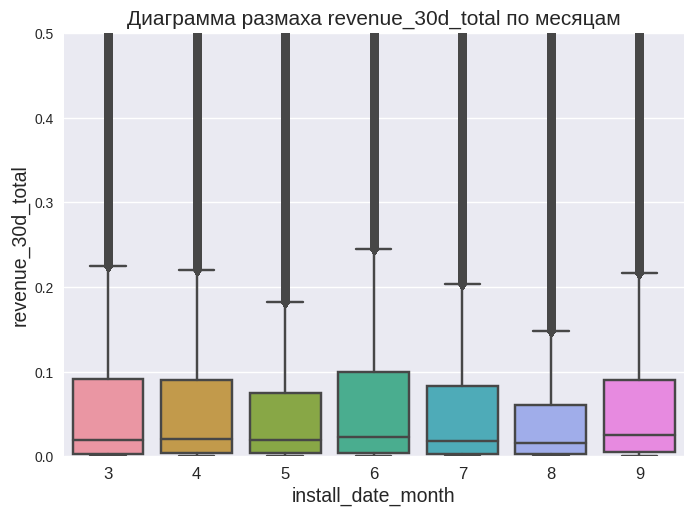

In [80]:
sns.boxplot(x=train["install_date_month"], y=train['revenue_30d_total']);
plt.ylim(0, 0.5)
plt.title('Диаграмма размаха revenue_30d_total по месяцам');

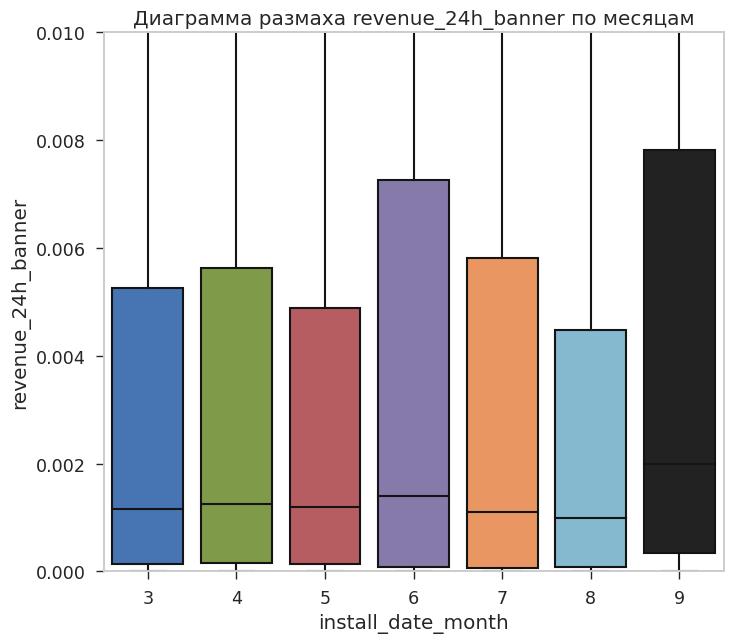

In [30]:
sns.boxplot(x=train["install_date_month"], y=train['revenue_24h_banner']);
plt.ylim(0, 0.01)
plt.title('Диаграмма размаха revenue_24h_banner по месяцам');

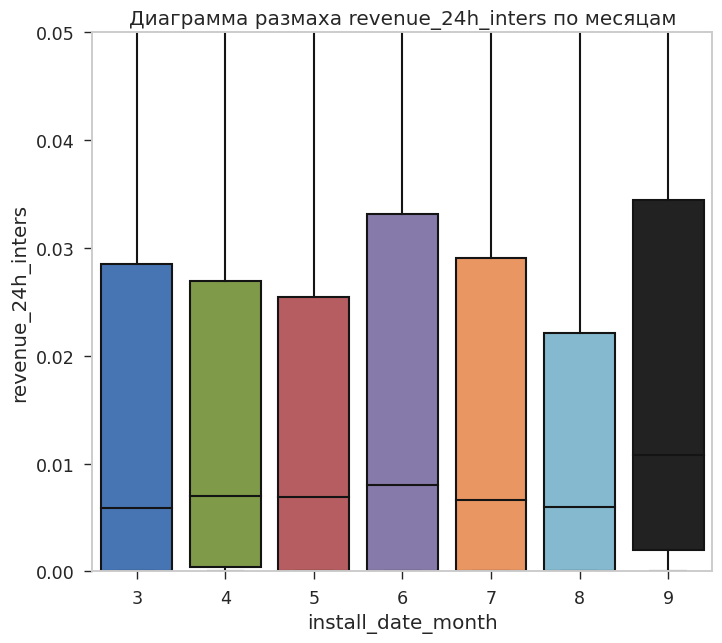

In [31]:
sns.boxplot(x=train["install_date_month"], y=train['revenue_24h_inters']);
plt.ylim(0, 0.05)
plt.title('Диаграмма размаха revenue_24h_inters по месяцам');

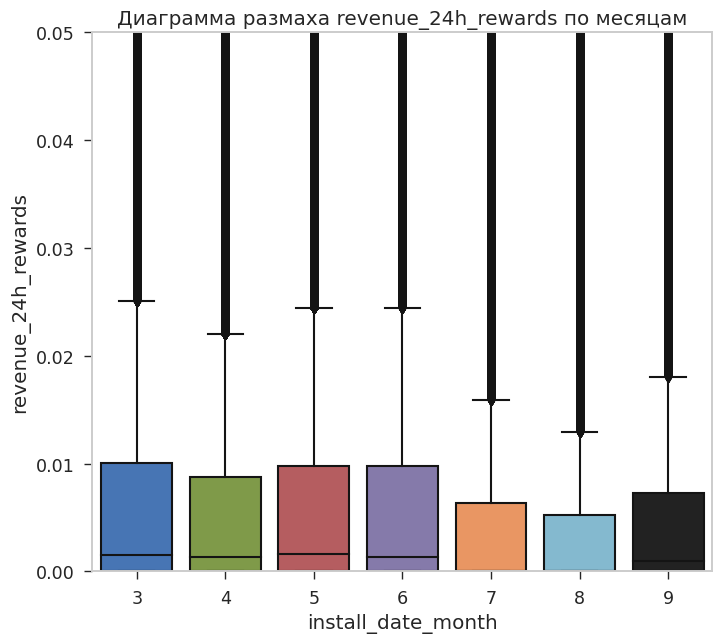

In [32]:
sns.boxplot(x=train["install_date_month"], y=train['revenue_24h_rewards']);
plt.ylim(0, 0.05)
plt.title('Диаграмма размаха revenue_24h_rewards по месяцам');

### ad_views_24h_total - количество просмотров рекламы всех типов за первые 24 часа после установки

In [33]:
# test 

print('кол-во уникальных значений', test['ad_views_24h_total'].nunique())
print('уникальные значения', test['ad_views_24h_total'].value_counts())
print('статистика', test['ad_views_24h_total'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['ad_views_24h_total'].nunique())
print('уникальные значения', train['ad_views_24h_total'].value_counts())
print('статистика', train['ad_views_24h_total'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 1356
уникальные значения 0       264599
1        97705
2        78814
3        66371
4        56198
         ...  
1564         1
1390         1
1407         1
1182         1
1099         1
Name: ad_views_24h_total, Length: 1356, dtype: int64
статистика count    1770460.00000
mean          32.75796
std           66.19304
min            0.00000
25%            3.00000
50%           12.00000
75%           35.00000
max         4644.00000
Name: ad_views_24h_total, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 1607
уникальные значения 0       615407
1       229686
2       183277
3       154758
4       131850
         ...  
1283         1
2302         1
1734         1
1578         1
1574         1
Name: ad_views_24h_total, Length: 1607, dtype: int64
статистика count    4125714.00000
mean          32.78635
std           66.23912
min            0.00000
25%            3.00000
50%           12.00000
75%           35.00000
max         5640.000

#выбросы в колонке,  ad_views_24h_total 398670
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.ad_views_24h_total)
is_outlier = (train.ad_views_24h_total < boundaries[0]) | (train.ad_views_24h_total > boundaries[1]) 

print('границы значений revenue_24h_rewards', boundaries)
print('кол-во выбросов в revenue_24h_rewards',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'ad_views_24h_total'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.ad_views_24h_total.describe())


### ad_views_24h_banner - количество просмотров баннерной рекламы за первые 24 часа после установки



In [34]:
# test 

print('кол-во уникальных значений', test['ad_views_24h_banner'].nunique())
print('уникальные значения', test['ad_views_24h_banner'].value_counts())
print('статистика', test['ad_views_24h_banner'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['ad_views_24h_banner'].nunique())
print('уникальные значения', train['ad_views_24h_banner'].value_counts())
print('статистика', train['ad_views_24h_banner'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 1183
уникальные значения 0       362110
1       116846
2        98810
3        78788
4        68586
         ...  
1119         1
1152         1
843          1
1099         1
1571         1
Name: ad_views_24h_banner, Length: 1183, dtype: int64
статистика count    1770460.00000
mean          22.88594
std           51.51628
min            0.00000
25%            1.00000
50%            7.00000
75%           23.00000
max         4635.00000
Name: ad_views_24h_banner, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 1424
уникальные значения 0       843439
1       275153
2       229672
3       184035
4       159552
         ...  
2201         1
1313         1
1637         1
1485         1
1155         1
Name: ad_views_24h_banner, Length: 1424, dtype: int64
статистика count    4125714.00000
mean          22.91962
std           51.56991
min            0.00000
25%            1.00000
50%            7.00000
75%           23.00000
max         5583.

#выбросы в колонке,  ad_views_24h_banner 412562
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.ad_views_24h_banner)
is_outlier = (train.ad_views_24h_banner < boundaries[0]) | (train.ad_views_24h_banner > boundaries[1]) 

print('границы значений ad_views_24h_banner', boundaries)
print('кол-во выбросов в ad_views_24h_banner',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'ad_views_24h_banner'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.ad_views_24h_banner.describe())


### ad_views_24h_inters - количество просмотров поп-ап рекламы за первые 24 часа после установки


In [35]:
# test 

print('кол-во уникальных значений', test['ad_views_24h_inters'].nunique())
print('уникальные значения', test['ad_views_24h_inters'].value_counts())
print('статистика', test['ad_views_24h_inters'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['ad_views_24h_inters'].nunique())
print('уникальные значения', train['ad_views_24h_inters'].value_counts())
print('статистика', train['ad_views_24h_inters'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 332
уникальные значения 0      456391
1      210561
2      162278
3      130024
4      104168
        ...  
310         1
385         1
309         1
295         1
358         1
Name: ad_views_24h_inters, Length: 332, dtype: int64
статистика count    1770460.00000
mean           7.69918
std           14.48005
min            0.00000
25%            0.00000
50%            3.00000
75%            9.00000
max          557.00000
Name: ad_views_24h_inters, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 364
уникальные значения 0      1063242
1       493578
2       378988
3       303561
4       242064
        ...   
325          1
339          1
406          1
324          1
306          1
Name: ad_views_24h_inters, Length: 364, dtype: int64
статистика count    4125714.00000
mean           7.69708
std           14.50767
min            0.00000
25%            0.00000
50%            3.00000
75%            9.00000
max          503.00000
Name: ad_

#выбросы в колонке,  ad_views_24h_inters 412562
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.ad_views_24h_inters)
is_outlier = (train.ad_views_24h_inters < boundaries[0]) | (train.ad_views_24h_inters > boundaries[1]) 

print('границы значений ad_views_24h_inters', boundaries)
print('кол-во выбросов в ad_views_24h_inters',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'ad_views_24h_inters'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.ad_views_24h_inters.describe())

### ad_views_24h_rewards - количество просмотров рекламы, за которую получает внутриигровые бонусы, за первые 24 часа после установки

In [36]:
# test 

print('кол-во уникальных значений', test['ad_views_24h_rewards'].nunique())
print('уникальные значения', test['ad_views_24h_rewards'].value_counts())
print('статистика', test['ad_views_24h_rewards'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['ad_views_24h_rewards'].nunique())
print('уникальные значения', train['ad_views_24h_rewards'].value_counts())
print('статистика', train['ad_views_24h_rewards'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 221
уникальные значения 0      817397
1      366777
2      191970
3      111273
4       68711
        ...  
181         1
224         1
255         1
219         1
230         1
Name: ad_views_24h_rewards, Length: 221, dtype: int64
статистика count    1770460.00000
mean           2.17283
std            5.53523
min            0.00000
25%            0.00000
50%            1.00000
75%            2.00000
max          397.00000
Name: ad_views_24h_rewards, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 246
уникальные значения 0      1907810
1       854135
2       447009
3       257595
4       161187
        ...   
251          1
265          1
203          1
341          1
218          1
Name: ad_views_24h_rewards, Length: 246, dtype: int64
статистика count    4125714.00000
mean           2.16965
std            5.52572
min            0.00000
25%            0.00000
50%            1.00000
75%            2.00000
max          407.00000
Name: 

#выбросы в колонке,  ad_views_24h_rewards 390969
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.ad_views_24h_rewards)
is_outlier = (train.ad_views_24h_rewards < boundaries[0]) | (train.ad_views_24h_rewards > boundaries[1]) 

print('границы значений ad_views_24h_rewards', boundaries)
print('кол-во выбросов в ad_views_24h_rewards',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'ad_views_24h_rewards'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.ad_views_24h_rewards.describe())

### сделаем суммарные графики по просмотру рекламы

ad_views_24h_total
ad_views_24h_banner - количество просмотров баннерной рекламы за первые 24 часа после установки больше
ad_views_24h_inters 
ad_views_24h_rewards

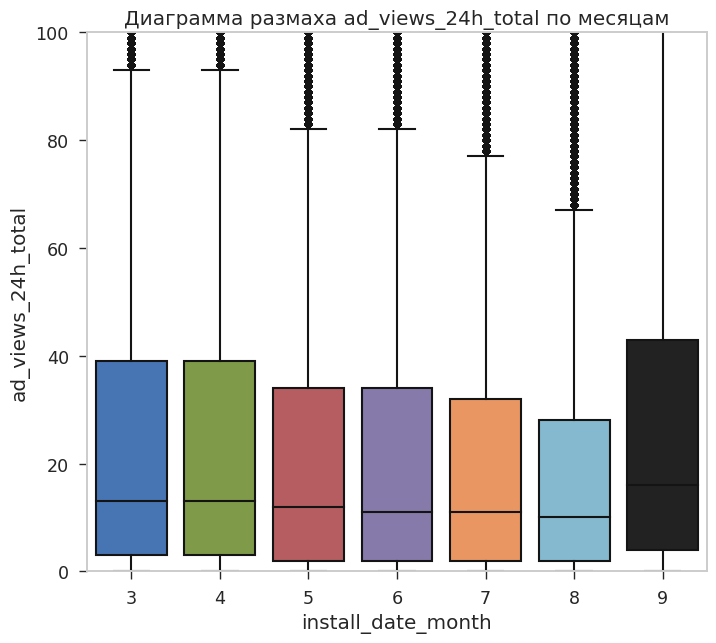

In [37]:
sns.boxplot(x=train["install_date_month"], y=train['ad_views_24h_total']);
plt.ylim(0, 100)
plt.title('Диаграмма размаха ad_views_24h_total по месяцам');

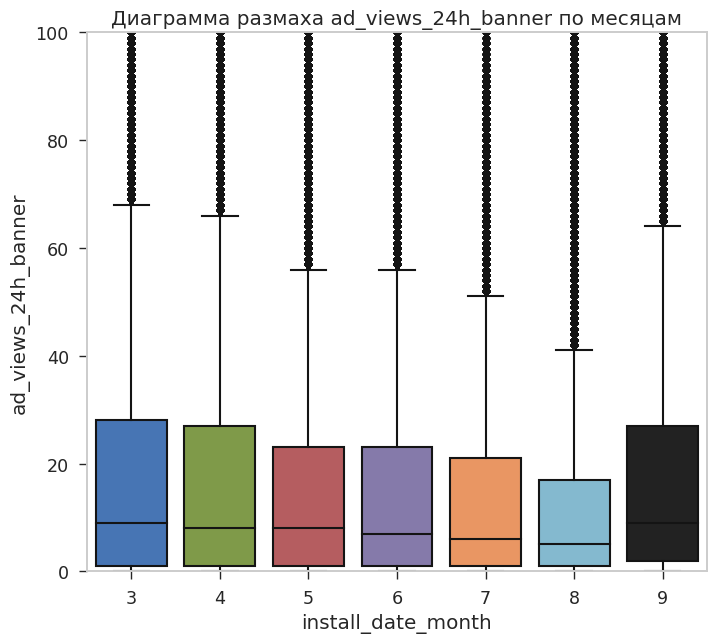

In [38]:
sns.boxplot(x=train["install_date_month"], y=train['ad_views_24h_banner']);
plt.ylim(0, 100)
plt.title('Диаграмма размаха ad_views_24h_banner по месяцам');

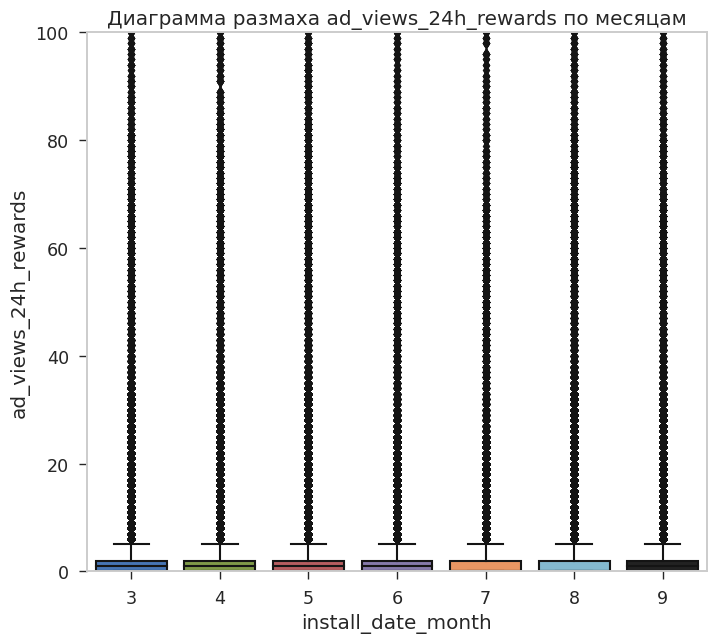

In [39]:
sns.boxplot(x=train["install_date_month"], y=train['ad_views_24h_rewards']);
plt.ylim(0, 100)
plt.title('Диаграмма размаха ad_views_24h_rewards по месяцам');

### sessions_24h- количество сессий (входов) в приложение за первые 24 часа после установки



In [40]:
# test 

print('кол-во уникальных значений', test['sessions_24h'].nunique())
print('уникальные значения', test['sessions_24h'].value_counts())
print('статистика', test['sessions_24h'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['sessions_24h'].nunique())
print('уникальные значения', train['sessions_24h'].value_counts())
print('статистика', train['sessions_24h'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 17
уникальные значения 1     992735
2     388473
3     177963
4      84230
0      49935
5      40765
6      19574
7       9418
8       4382
9       1831
10       723
11       309
12        85
13        31
14         3
16         2
15         1
Name: sessions_24h, dtype: int64
статистика count    1770460.00000
mean           1.74608
std            1.26670
min            0.00000
25%            1.00000
50%            1.00000
75%            2.00000
max           16.00000
Name: sessions_24h, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 17
уникальные значения 1     2315930
2      904254
3      414610
4      196655
0      114979
5       94637
6       45661
7       22012
8       10036
9        4313
10       1686
11        637
12        204
13         69
14         21
15          6
16          4
Name: sessions_24h, dtype: int64
статистика count    4125714.00000
mean           1.74585
std            1.26565
min            0.00000
25%       

#выбросы в колонке,  sessions_24h 390969
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.sessions_24h)
is_outlier = (train.sessions_24h < boundaries[0]) | (train.sessions_24h > boundaries[1]) 

print('границы значений sessions_24h', boundaries)
print('кол-во выбросов в sessions_24h',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'sessions_24h'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.sessions_24h.describe())

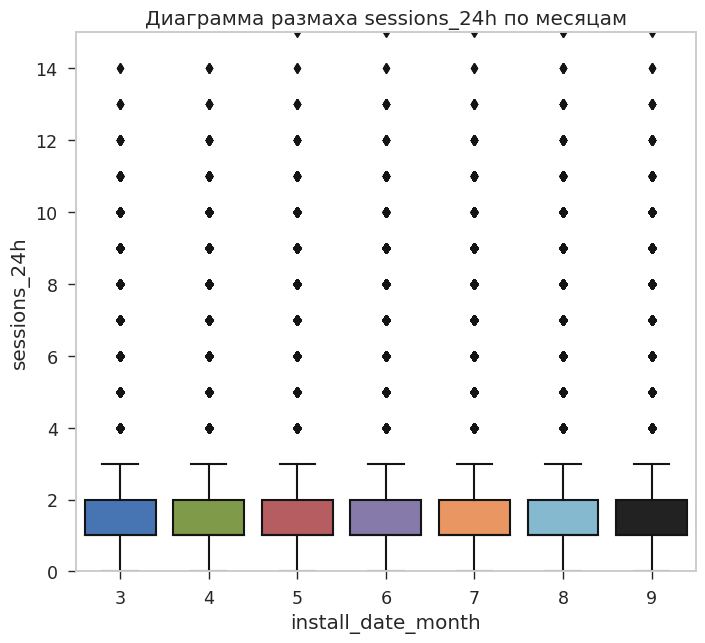

In [41]:
sns.boxplot(x=train["install_date_month"], y=train['sessions_24h']);
plt.ylim(0, 15)
plt.title('Диаграмма размаха sessions_24h по месяцам');

### conversion_duration время в секундах между просмотром рекламы нашего приложения и установкой приложения (учитывается не для всех источников рекламы, по-умолчанию 0)

есть два месяца, где время между просмотром рекламы и установкой приложения было минимальным, те максимально быстро установили это 7-июль и 9-сентябрь

In [42]:
# test 

print('кол-во уникальных значений', test['conversion_duration'].nunique())
print('уникальные значения', test['conversion_duration'].value_counts())
print('статистика', test['conversion_duration'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['conversion_duration'].nunique())
print('уникальные значения', train['conversion_duration'].value_counts())
print('статистика', train['conversion_duration'].describe().apply(lambda x: f'{x:.5f}'))
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 114485
уникальные значения 0         831598
54          2588
59          2557
62          2552
56          2550
           ...  
26193          1
95967          1
142336         1
106008         1
110377         1
Name: conversion_duration, Length: 114485, dtype: int64
статистика count    1770460.00000
mean       11146.22443
std        73427.05696
min            0.00000
25%            0.00000
50%           45.00000
75%          560.00000
max      9679890.00000
Name: conversion_duration, dtype: object
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 175983
уникальные значения 0         1935434
61           5915
53           5913
56           5896
55           5842
           ...   
131016          1
507176          1
250735          1
70444           1
221849          1
Name: conversion_duration, Length: 175983, dtype: int64
статистика count    4125714.00000
mean       11168.39029
std        74833.28786
min            0.00000
25%            0.00000


#выбросы в колонке,  conversion_duration 769641
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.conversion_duration)
is_outlier = (train.conversion_duration < boundaries[0]) | (train.conversion_duration > boundaries[1]) 

print('границы значений conversion_duration', boundaries)
print('кол-во выбросов в conversion_duration',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'conversion_duration'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.conversion_duration.describe())

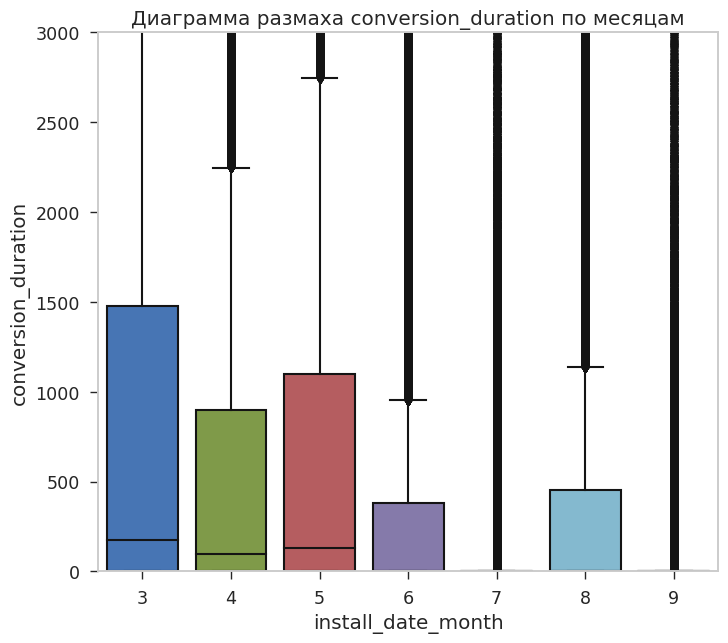

In [43]:
sns.boxplot(x=train["install_date_month"], y=train['conversion_duration']);
plt.ylim(0, 3000)
plt.title('Диаграмма размаха conversion_duration по месяцам');

### language - язык устройства
английский язык самый встречаемый. далее русский
пропуски заполнены

In [44]:
# test 

print('кол-во уникальных значений', test['language'].nunique())
print('уникальные значения', test['language'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['language'].nunique())
print('уникальные значения', train['language'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


#пропуски заполнить частым значением en
train['language']=train.language.fillna('en')
test['language']=test.language.fillna('en')

кол-во уникальных значений 76
уникальные значения en    715698
ru    239157
ar    180054
es    118023
id     96839
       ...  
or         2
be         2
am         2
so         2
mt         1
Name: language, Length: 76, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 83
уникальные значения en    1667236
ru     553870
ar     422258
es     274928
id     225954
       ...   
to          1
tk          1
ku          1
ha          1
tg          1
Name: language, Length: 83, dtype: int64
Размер выбоpки test: 4125714, 24


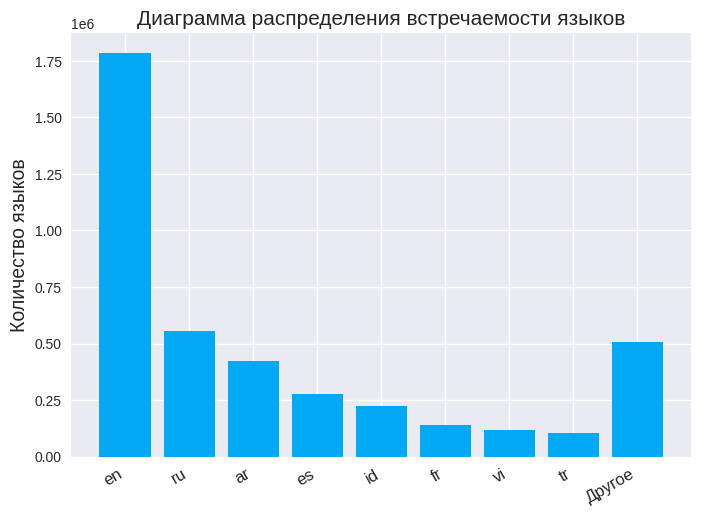

In [45]:
type_counts = train['language'].value_counts()

other_types = type_counts[type_counts<100000]
type_counts = type_counts[type_counts>100000]
type_counts['Другое'] = other_types.sum()


plt.style.use('seaborn') # Смена стиля всех графиков matplotlib

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'axes.labelsize': 14    # Размер шрифта подписей осей
          }
plt.rcParams.update(params) # Фиксация параметров

plt.ylabel('Количество языков') # Подпись оси Y
plt.title('Диаграмма распределения встречаемости языков') # Подпись всего графика

plt.xticks(rotation=30, ha = 'right') # Поворот на 30 градусов подписей оси X и выравнивание по правому краю

plt.bar(type_counts.index, type_counts.values, color='#03A9F4') 
plt.show()

### api_level - https://developer.android.com/studio/releases/platforms



In [46]:
# test 

print('кол-во уникальных значений', test['api_level'].nunique())
print('уникальные значения', test['api_level'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['api_level'].nunique())
print('уникальные значения', train['api_level'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


#пропуски заполнить частым значением 30.0
train['api_level']=train.api_level.fillna('30.0')
test['api_level']=test.api_level.fillna('30.0')

кол-во уникальных значений 14
уникальные значения 30.0    687427
29.0    398808
31.0    268956
28.0    162193
27.0     83644
26.0     29656
23.0     23556
24.0     21643
25.0     20934
22.0     12142
19.0      6390
32.0      2552
21.0      1957
33.0       141
Name: api_level, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 14
уникальные значения 30.0    1603835
29.0     929459
31.0     628200
28.0     375873
27.0     194836
26.0      69655
23.0      54119
24.0      50687
25.0      48405
22.0      28312
19.0      15216
32.0       5978
21.0       4516
33.0        379
Name: api_level, dtype: int64
Размер выбоpки test: 4125714, 24


### device_price - примерная стоимость девайса на момент старта продаж в $ (определяется неточно, и не для всех пользователей)

In [47]:
# test 

print('кол-во уникальных значений', test['device_price'].nunique())
print('уникальные значения', test['device_price'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['device_price'].nunique())
print('уникальные значения', train['device_price'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))



кол-во уникальных значений 33
уникальные значения 0       791552
150     178513
200     168677
100     161213
250     109069
300      79564
350      46138
400      36145
50       34085
500      28972
800      20316
1100     19241
700      18199
600      16405
450      16168
900      14509
1300     10951
1000      4403
1200      4286
1500      3992
1400      3798
1800      2304
2300      1101
1600       358
2000       339
4500        48
2400        47
1900        36
2500        21
1700         4
7500         3
2200         2
3000         1
Name: device_price, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 33
уникальные значения 0        1845124
150       414495
200       391930
100       376355
250       253450
300       184716
350       107516
400        83603
50         79124
500        67884
800        48149
1100       45673
700        43458
600        38366
450        38027
900        33732
1300       25572
1200       10005
1000        9998
1400        9317

#выбросы в колонке,  device_price 283490
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(train.device_price)
is_outlier = (train.device_price < boundaries[0]) | (train.device_price > boundaries[1]) 

print('границы значений device_price', boundaries)
print('кол-во выбросов в device_price',is_outlier.sum())

#выбросы cреди верхних значений. поэтому заменим их на границы верхних
train.loc[is_outlier, 'device_price'] = int(boundaries[1]) 


print('кол-во выбросов в значении года после заполнения нижней границей',is_outlier.sum())
pd.options.display.float_format = '{:.4f}'.format
print(train.device_price.describe())

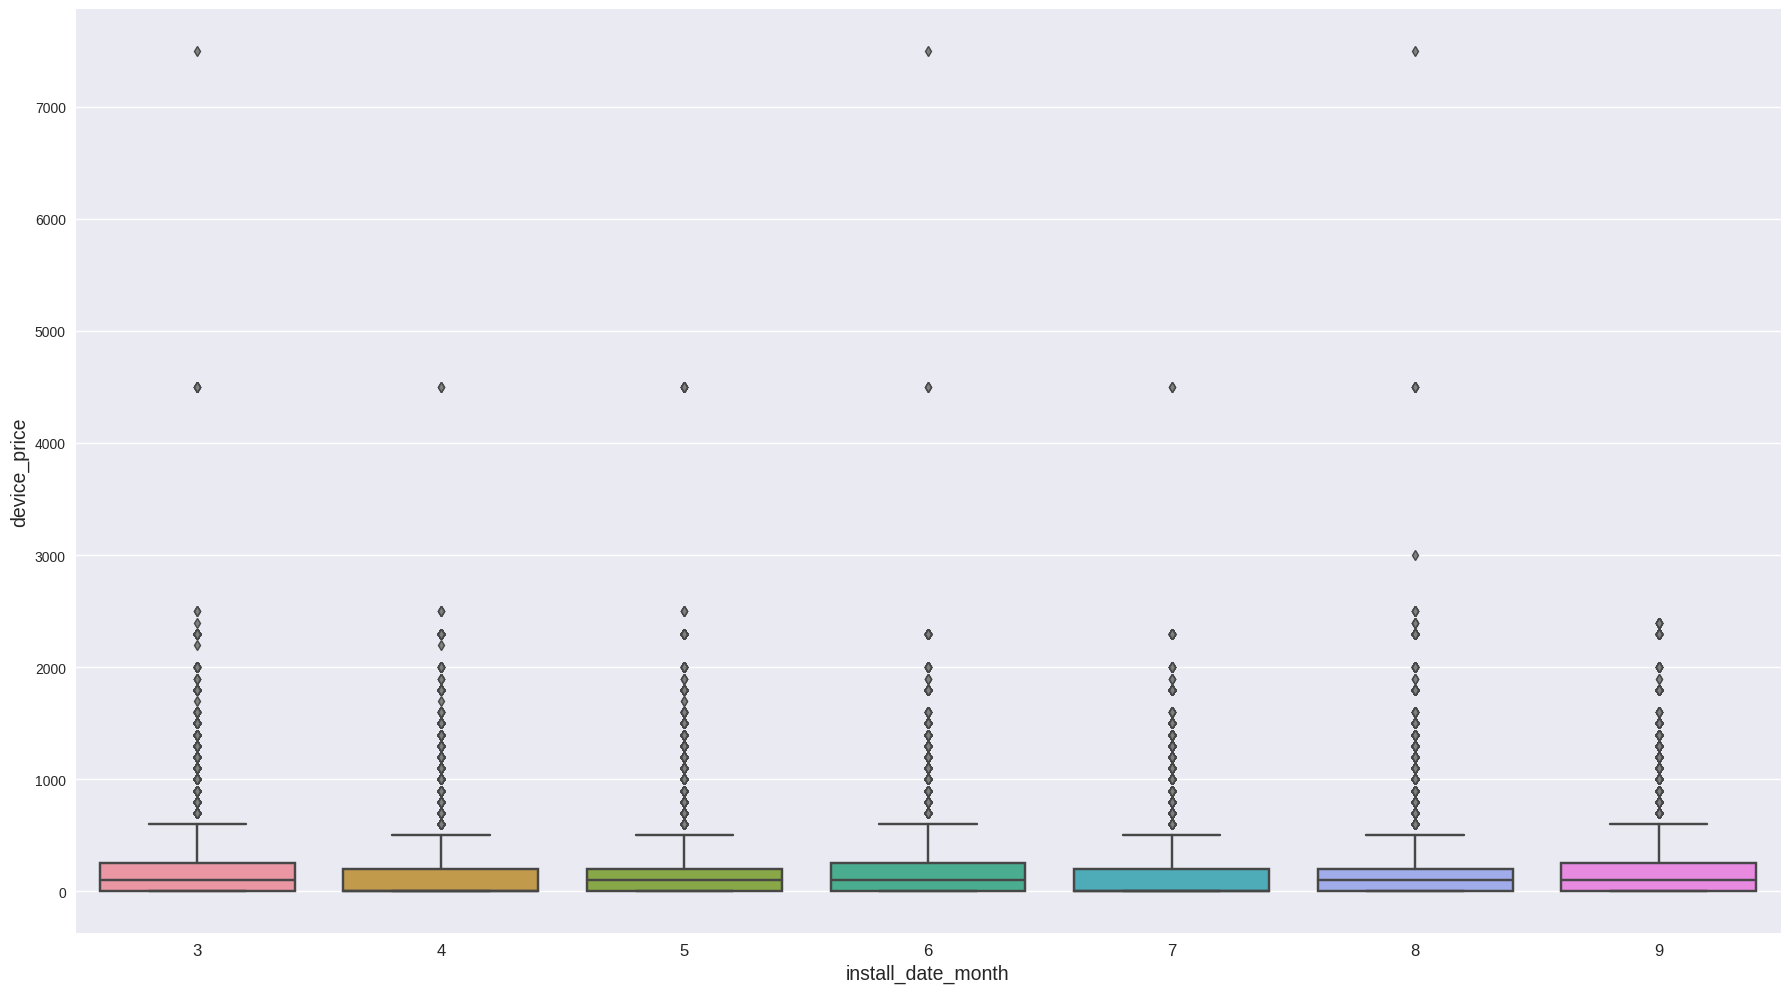

In [48]:
plt.figure(figsize=(22, 12))
sns.boxplot(x=test['install_date_month'], y=test['device_price'], flierprops=dict(markerfacecolor="#808080"))
#plt.ylim(0, 800)
plt.show()

### device_ram - количество оперативной памяти на устройстве пользователя
много 0 значений. в основном 4096 мб оперативки у пользователей


In [49]:
# test 

print('кол-во уникальных значений', test['device_ram'].nunique())
print('уникальные значения', test['device_ram'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['device_ram'].nunique())
print('уникальные значения', train['device_ram'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))



кол-во уникальных значений 21
уникальные значения 0        727142
4096     316597
6144     201224
8192     174865
3072     159859
2048     122994
12288     37211
1024      15721
1536       9028
16384      4353
512         991
10240       180
256          84
32           72
4093         61
768          61
18432         8
24            5
1843          2
128           1
202           1
Name: device_ram, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 21
уникальные значения 0        1694985
4096      734293
6144      469414
8192      408419
3072      373530
2048      286290
12288      87823
1024       36696
1536       20665
16384      10182
512         2281
10240        435
256          232
768          164
32           146
4093         127
18432         16
8             12
202            2
24             1
128            1
Name: device_ram, dtype: int64
Размер выбоpки test: 4125714, 24


In [50]:
#0 значений в колонке 727142 . заполним частым значение, памяти не может быть 0
test.loc[test['device_ram'] == 0, 'device_ram'] = test['device_ram'].apply(lambda x: 4096)
train.loc[train['device_ram'] == 0, 'device_ram'] = train['device_ram'].apply(lambda x: 4096)

### cpu_cores - количество ядер процессора в устройстве 
test 8 уникальных значений.  самое популярное значение кол-во ядер = 8
train 9 уникальных значений.  самое популярное значение кол-во ядер = 8, также есть второе по популярности пропущенные значения 0. нужно его заполнить. используем 

In [51]:
# test 
print('кол-во уникальных значений', test['cpu_cores'].nunique())
print('уникальные значения', test['cpu_cores'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train 
print('кол-во уникальных значений', train['cpu_cores'].nunique())
print('уникальные значения', train['cpu_cores'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))

кол-во уникальных значений 8
уникальные значения 8     949805
0     728492
4      89746
2       1687
6        533
10       115
1         81
3          1
Name: cpu_cores, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 9
уникальные значения 8     2212941
0     1697988
4      209061
2        3924
6        1307
10        272
1         219
3           1
16          1
Name: cpu_cores, dtype: int64
Размер выбоpки test: 4125714, 24


In [52]:
# 0 значений в колонке 1697988 . заполним медианой
test_fillna = test.groupby('device_ram').agg(cpu_cores_median=('cpu_cores', np.median)).fillna(method='ffill').reset_index()
test = pd.merge(test, test_fillna, how='left', on='device_ram')
test.loc[test['cpu_cores'] == 0, 'cpu_cores'] = test['cpu_cores_median']
#  все равно остались 0, но уже меньше, заменим их на постоянное значение 8
test_fillna
test.loc[test['cpu_cores'] == 0, 'cpu_cores'] = test['cpu_cores'].apply(lambda x: 8)
test = test.drop(['cpu_cores_median'], axis=1)

In [53]:
# 0 значений в колонке 1697988 . заполним медианой
train_fillna = train.groupby('device_ram').agg(cpu_cores_median=('cpu_cores', np.median)).fillna(method='ffill').reset_index()
train = pd.merge(train, train_fillna, how='left', on='device_ram')
train.loc[train['cpu_cores'] == 0, 'cpu_cores'] = train['cpu_cores_median']
#  все равно остались 0, но уже меньше, заменим их на постоянное значение 8
train_fillna
train.loc[train['cpu_cores'] == 0, 'cpu_cores'] = train['cpu_cores'].apply(lambda x: 8)
train = train.drop(['cpu_cores_median'], axis=1)

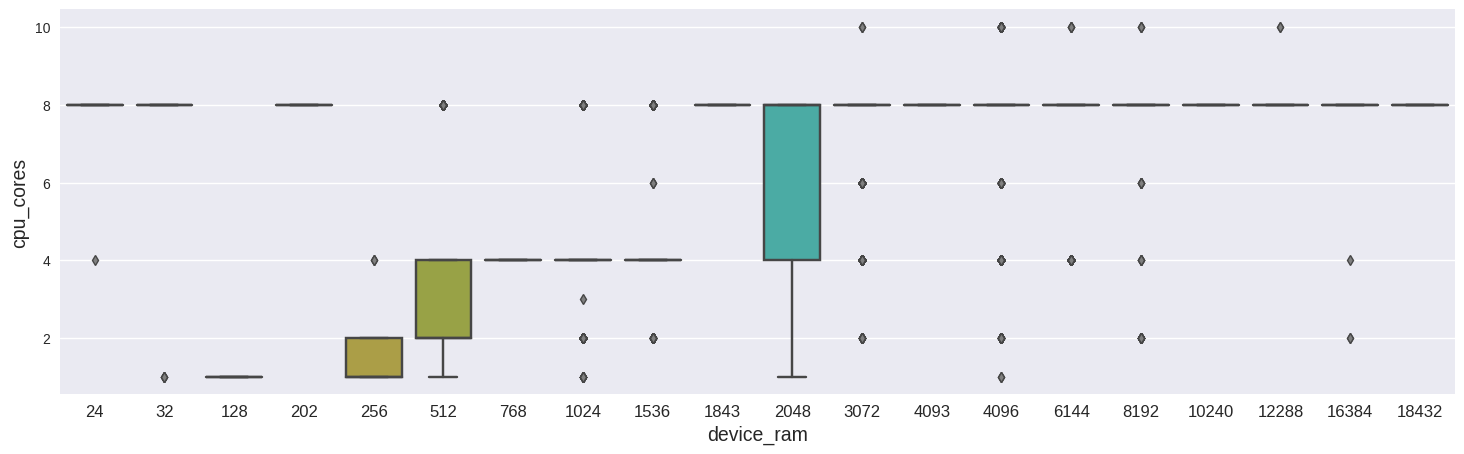

In [54]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=test['device_ram'], y=test['cpu_cores'], flierprops=dict(markerfacecolor="#808080"))
plt.show()

### screen_inches_diagonal - диагональ экрана устройства пользователя 
В признаке есть нулевые значения - их большая часть, при прогнозировании целевого параметра revenue_30d_total, данный признак возможно не будет важным.
заполним пропущенные значения медианой (она более стабильна к выбросам), среднее применять в данном случае нельзя, тк выбросов много  
неплохая корреляция видится у признаков cpu_cores и screen_inches_diagonal

In [55]:
# test 184 уникальных значения, большая часть пустые значения 0

print('кол-во уникальных значений', test['screen_inches_diagonal'].nunique())
print('уникальные значения', test['screen_inches_diagonal'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train 203 уникальных значения, большая часть пустые значения 0
print('кол-во уникальных значений', train['screen_inches_diagonal'].nunique())
print('уникальные значения', train['screen_inches_diagonal'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 184
уникальные значения 0.00     726247
6.50     211639
6.40      81345
6.53      72984
6.20      45607
          ...  
9.40          1
13.00         1
10.60         1
6.25          1
4.27          1
Name: screen_inches_diagonal, Length: 184, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 203
уникальные значения 0.00     1692821
6.50      493534
6.40      188773
6.53      168747
6.20      107311
          ...   
5.48           1
2.20           1
3.54           1
10.95          1
4.27           1
Name: screen_inches_diagonal, Length: 203, dtype: int64
Размер выбоpки test: 4125714, 24


In [56]:
# 0 значений в колонке 1692821 . заполним медианой
train_fillna = train.groupby('device_ram').agg(screen_inches_diagonal_median=('screen_inches_diagonal', np.median)).fillna(method='ffill').reset_index()
train = pd.merge(train, train_fillna, how='left', on='device_ram')
train.loc[train['screen_inches_diagonal'] == 0, 'screen_inches_diagonal'] = train['screen_inches_diagonal_median']

#  все равно остались 0, но уже меньше, заменим их на постоянное значение 6.5
train_fillna
train.loc[train['screen_inches_diagonal'] == 0, 'screen_inches_diagonal'] = train['screen_inches_diagonal'].apply(lambda x: 6.5)
train = train.drop(['screen_inches_diagonal_median'], axis=1)

In [57]:
# 0 значений в колонке 1692821 . заполним медианой
test_fillna = test.groupby('device_ram').agg(screen_inches_diagonal_median=('screen_inches_diagonal', np.median)).fillna(method='ffill').reset_index()
test = pd.merge(test, test_fillna, how='left', on='device_ram')
test.loc[test['screen_inches_diagonal'] == 0, 'screen_inches_diagonal'] = test['screen_inches_diagonal_median']

#  все равно остались 0, но уже меньше, заменим их на постоянное значение 6.5
test_fillna
test.loc[test['screen_inches_diagonal'] == 0, 'screen_inches_diagonal'] = test['screen_inches_diagonal'].apply(lambda x: 6.5)
test = test.drop(['screen_inches_diagonal_median'], axis=1)

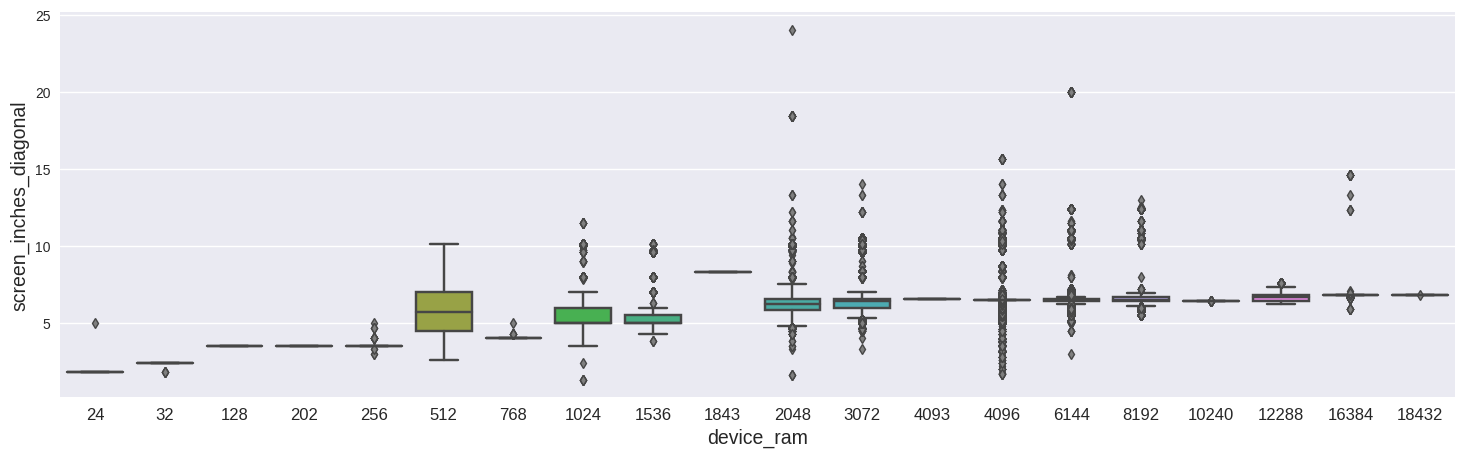

In [58]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=test['device_ram'], y=test['screen_inches_diagonal'], flierprops=dict(markerfacecolor="#808080"))
plt.show()

### screen_pixels_width -  разрешение экрана по ширине


In [59]:
# test 

print('кол-во уникальных значений', test['screen_pixels_width'].nunique())
print('уникальные значения', test['screen_pixels_width'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['screen_pixels_width'].nunique())
print('уникальные значения', train['screen_pixels_width'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 72
уникальные значения 0       726651
720     470633
1080    453670
1440     54860
1280     13724
         ...  
764          1
490          1
3840         1
2200         1
2176         1
Name: screen_pixels_width, Length: 72, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 79
уникальные значения 0       1693721
720     1096746
1080    1055477
1440     129423
1280      31871
         ...   
1224          1
2200          1
1872          1
840           1
1116          1
Name: screen_pixels_width, Length: 79, dtype: int64
Размер выбоpки test: 4125714, 24


In [60]:
# 0 значений в колонке 1692821 . заполним медианой
train_fillna = train.groupby('device_ram').agg(screen_pixels_width_median=('screen_pixels_width', np.median)).fillna(method='ffill').reset_index()
train = pd.merge(train, train_fillna, how='left', on='device_ram')
train.loc[train['screen_pixels_width'] == 0, 'screen_pixels_width'] = train['screen_pixels_width_median']

#  все равно остались 0, но уже меньше, заменим их на постоянное значение 720
train_fillna
train.loc[train['screen_pixels_width'] == 0, 'screen_pixels_width'] = train['screen_pixels_width'].apply(lambda x: 720)
train = train.drop(['screen_pixels_width_median'], axis=1)

In [61]:
# 0 значений в колонке 1692821 . заполним медианой
test_fillna = test.groupby('device_ram').agg(screen_pixels_width_median=('screen_pixels_width', np.median)).fillna(method='ffill').reset_index()
test = pd.merge(test, test_fillna, how='left', on='device_ram')
test.loc[test['screen_pixels_width'] == 0, 'screen_pixels_width'] = test['screen_pixels_width_median']

#  все равно остались 0, но уже меньше, заменим их на постоянное значение 720
test_fillna
test.loc[test['screen_pixels_width'] == 0, 'screen_pixels_width'] = test['screen_pixels_width'].apply(lambda x: 720)
test = test.drop(['screen_pixels_width_median'], axis=1)

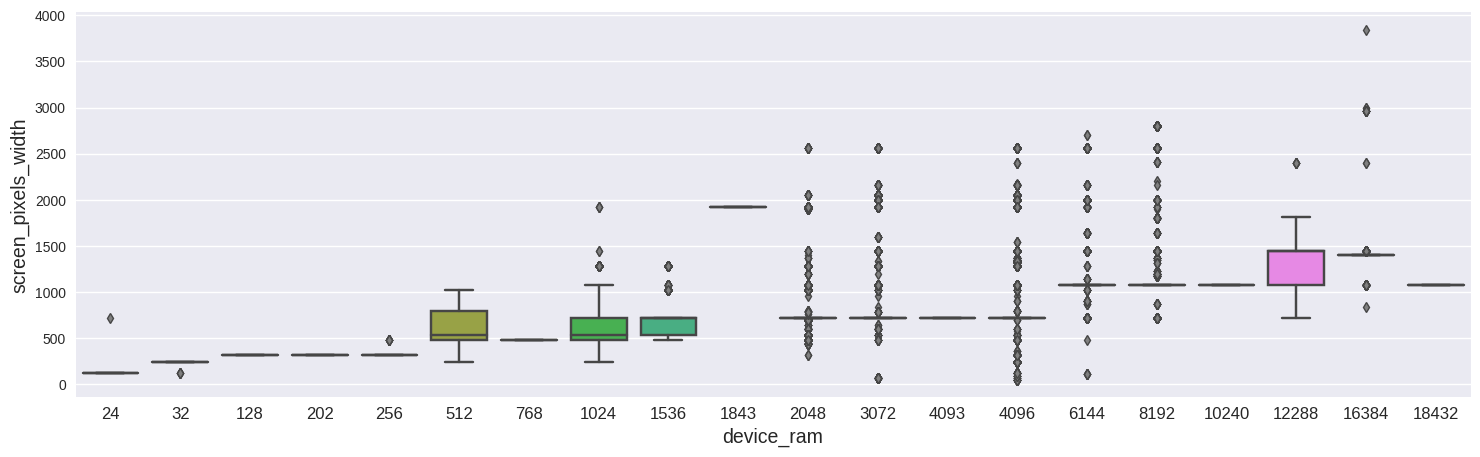

In [62]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=test['device_ram'], y=test['screen_pixels_width'], flierprops=dict(markerfacecolor="#808080"))
plt.show()

### screen_pixels_height - разрешение экрана по высоте


In [63]:
# test 

print('кол-во уникальных значений', test['screen_pixels_height'].nunique())
print('уникальные значения', test['screen_pixels_height'].value_counts())
print('Размер выбоpки test: {}, {}'.format(test.shape[0], test.shape[1]))

# train
print('кол-во уникальных значений', train['screen_pixels_height'].nunique())
print('уникальные значения', train['screen_pixels_height'].value_counts())
print('Размер выбоpки test: {}, {}'.format(train.shape[0], train.shape[1]))


кол-во уникальных значений 118
уникальные значения 0       726651
1600    259802
2400    196479
2340    141762
1520     65723
         ...  
680          1
2790         1
1660         1
1350         1
900          1
Name: screen_pixels_height, Length: 118, dtype: int64
Размер выбоpки test: 1770460, 24
кол-во уникальных значений 130
уникальные значения 0       1693721
1600     605109
2400     457388
2340     329105
1520     153287
         ...   
533           1
1136          1
1208          1
850           1
900           1
Name: screen_pixels_height, Length: 130, dtype: int64
Размер выбоpки test: 4125714, 24


In [64]:
# 0 значений в колонке 726651 . заполним медианой
train_fillna = train.groupby('device_ram').agg(screen_pixels_height_median=('screen_pixels_height', np.median)).fillna(method='ffill').reset_index()
train = pd.merge(train, train_fillna, how='left', on='device_ram')
train.loc[train['screen_pixels_height'] == 0, 'screen_pixels_height'] = train['screen_pixels_height_median']

#  все равно остались 0, но уже меньше, заменим их на постоянное значение 1600
train_fillna
train.loc[train['screen_pixels_height'] == 0, 'screen_pixels_height'] = train['screen_pixels_height'].apply(lambda x: 1600)
train = train.drop(['screen_pixels_height_median'], axis=1)

In [65]:
# 0 значений в колонке 726651 . заполним медианой
test_fillna = test.groupby('device_ram').agg(screen_pixels_height_median=('screen_pixels_height', np.median)).fillna(method='ffill').reset_index()
test = pd.merge(test, test_fillna, how='left', on='device_ram')
test.loc[test['screen_pixels_height'] == 0, 'screen_pixels_height'] = test['screen_pixels_height_median']

#  все равно остались 0, но уже меньше, заменим их на постоянное значение 1600
test_fillna
test.loc[test['screen_pixels_height'] == 0, 'screen_pixels_height'] = test['screen_pixels_height'].apply(lambda x: 1600)
test = test.drop(['screen_pixels_height_median'], axis=1)

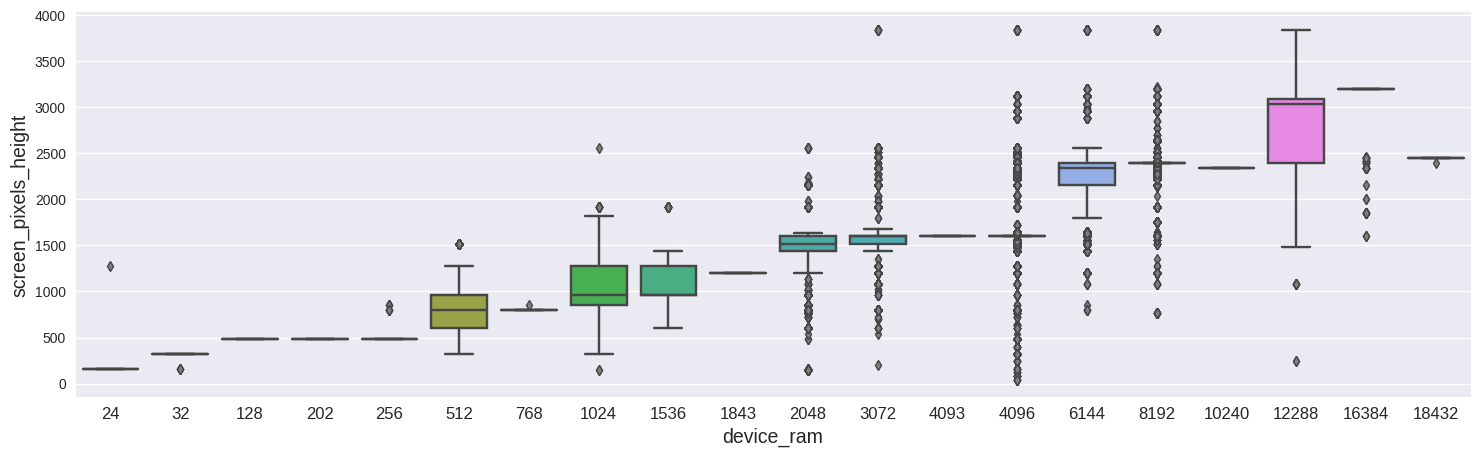

In [66]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=test['device_ram'], y=test['screen_pixels_height'], flierprops=dict(markerfacecolor="#808080"))
plt.show()

# **2. ПОИСК КОРРЕЛЯЦИЙ**

---


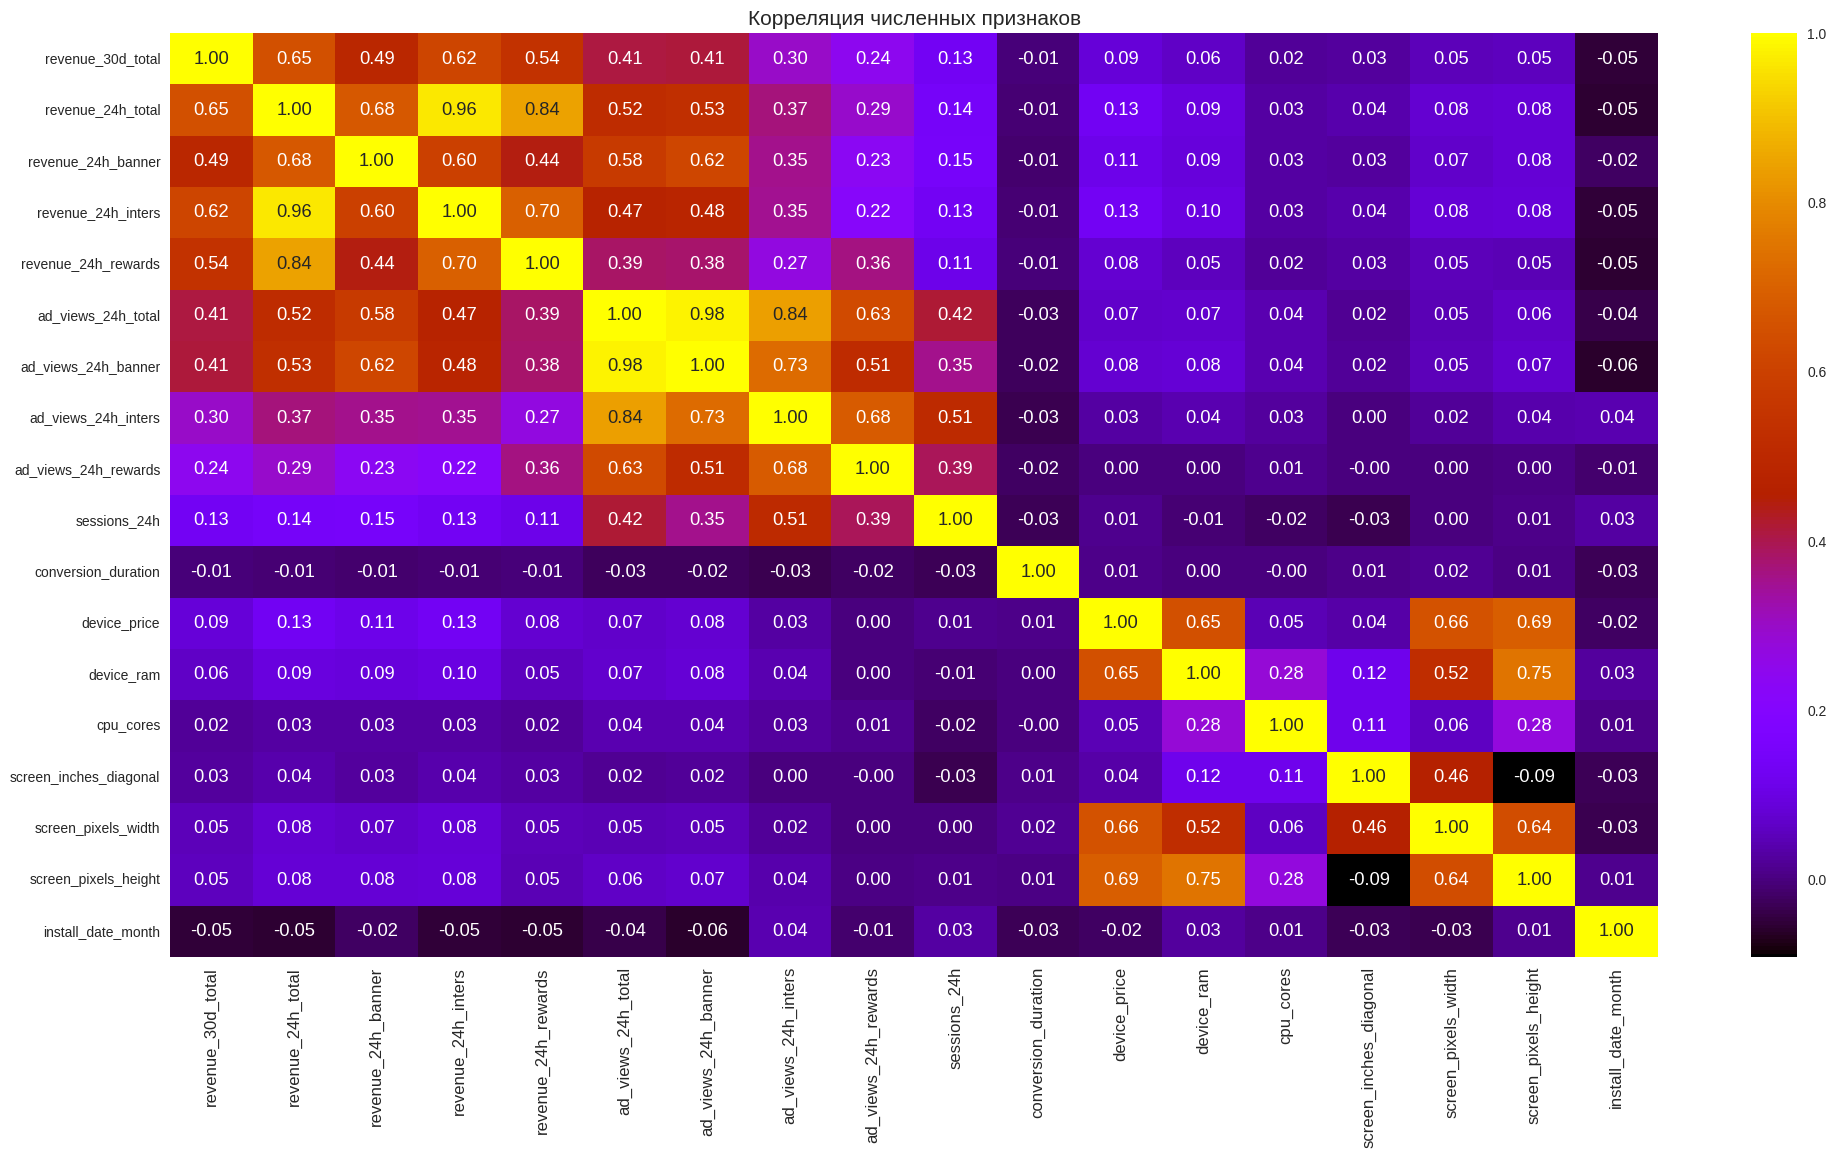

In [67]:
numerical_columns = [
   'revenue_30d_total', 'revenue_24h_total', 'revenue_24h_banner', 'revenue_24h_inters', 
    'revenue_24h_rewards', 'ad_views_24h_total', 'ad_views_24h_banner', 'ad_views_24h_inters', 
    'ad_views_24h_rewards', 'sessions_24h', 'conversion_duration', 'device_price', 'device_ram', 
    'cpu_cores', 'screen_inches_diagonal', 'screen_pixels_width', 'screen_pixels_height', 'install_date_month']

plt.figure(figsize=(24,12))
sns.heatmap(train[numerical_columns].corr(), annot=True, fmt='0.2f', cmap= 'gnuplot')
plt.title('Корреляция численных признаков');

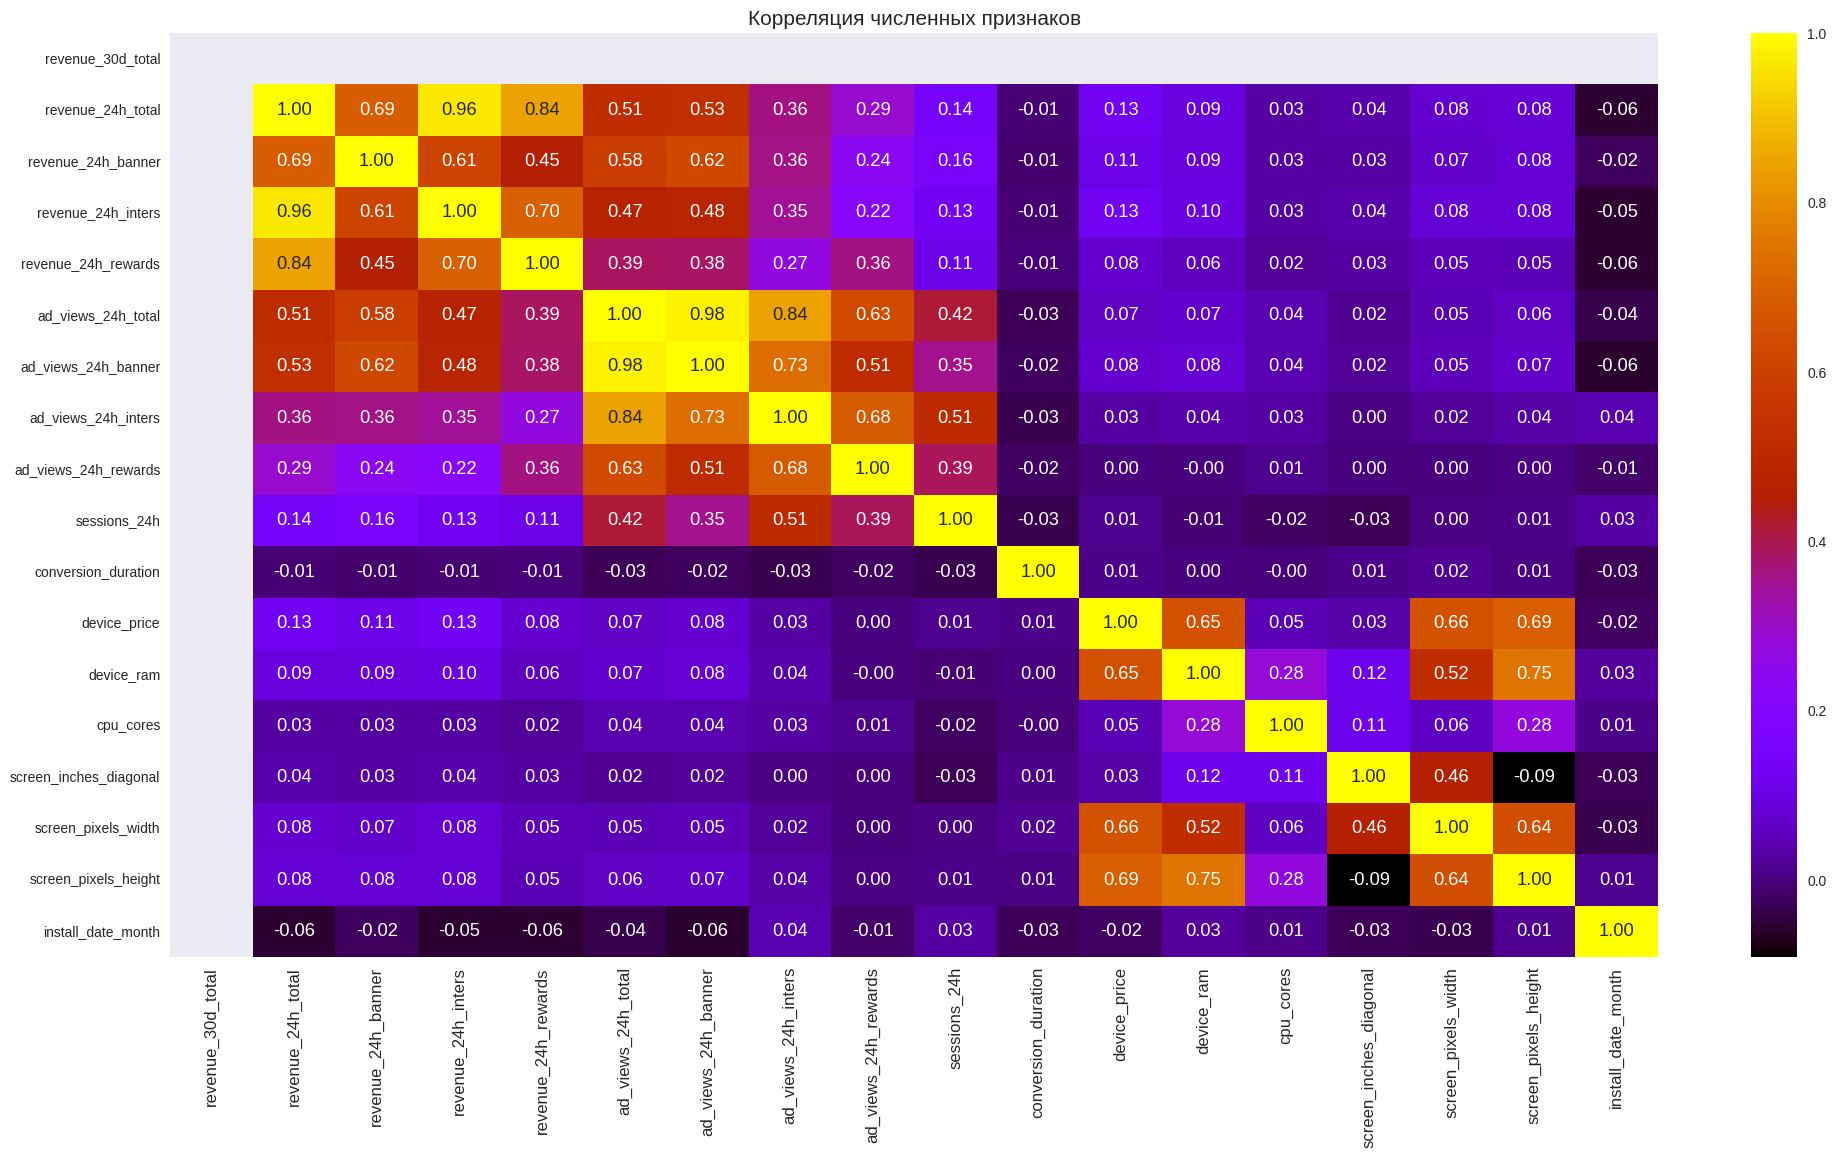

In [68]:
plt.figure(figsize=(24,12))
sns.heatmap(test[numerical_columns].corr(), annot=True, fmt='0.2f', cmap= 'gnuplot')
plt.title('Корреляция численных признаков');

In [69]:
numerical_columns_2 = test[['revenue_30d_total', 'revenue_24h_total', 'revenue_24h_banner',
                            'revenue_24h_inters', 'revenue_24h_rewards', 'ad_views_24h_total', 
                            'ad_views_24h_banner', 'ad_views_24h_inters', 'ad_views_24h_rewards',
                            'sessions_24h', 'conversion_duration', 'device_price', 'device_ram', 
                            'cpu_cores', 'screen_inches_diagonal', 'screen_pixels_width', 
                            'screen_pixels_height', 'install_date_month']]


In [70]:
print(test.isna().sum())
#test[test.duplicated()]

random_user_id            0
install_date              0
revenue_30d_total         0
revenue_24h_total         0
revenue_24h_banner        0
revenue_24h_inters        0
revenue_24h_rewards       0
ad_views_24h_total        0
ad_views_24h_banner       0
ad_views_24h_inters       0
ad_views_24h_rewards      0
sessions_24h              0
conversion_duration       0
language                  0
api_level                 0
device_price              0
device_ram                0
cpu_cores                 0
screen_inches_diagonal    0
screen_pixels_width       0
screen_pixels_height      0
install_date_month        0
install_date_day          0
Android                   0
dtype: int64


In [71]:
print(train.isna().sum())
train[train.duplicated()]

random_user_id            0
install_date              0
revenue_30d_total         0
revenue_24h_total         0
revenue_24h_banner        0
revenue_24h_inters        0
revenue_24h_rewards       0
ad_views_24h_total        0
ad_views_24h_banner       0
ad_views_24h_inters       0
ad_views_24h_rewards      0
sessions_24h              0
conversion_duration       0
language                  0
api_level                 0
device_price              0
device_ram                0
cpu_cores                 0
screen_inches_diagonal    0
screen_pixels_width       0
screen_pixels_height      0
install_date_month        0
install_date_day          0
Android                   0
dtype: int64


,random_user_id,install_date,revenue_30d_total,revenue_24h_total,revenue_24h_banner,revenue_24h_inters,revenue_24h_rewards,ad_views_24h_total,ad_views_24h_banner,ad_views_24h_inters,...,api_level,device_price,device_ram,cpu_cores,screen_inches_diagonal,screen_pixels_width,screen_pixels_height,install_date_month,install_date_day,Android


In [72]:
test.shape

(1770460, 24)

In [73]:
train.shape

(4125714, 24)

In [74]:
# подготовим абсолютный путь до папки с данными
path = os.path.expanduser('~/PycharmProjects/Brightika_test/')
test.to_csv(path + 'test_out_outliers.csv', index=False)

In [75]:
# подготовим абсолютный путь до папки с данными
path = os.path.expanduser('~/PycharmProjects/Brightika_test/')
train.to_csv(path + 'train_out_outliers.csv', index=False)